# CAPSTONE PROJECT : Bank's direct marketing campaign.

## Problem Statement: Predicting the success of a bank's direct marketing campaign (phone calls).

# Bank client data:
Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')





# Related with the last contact of the current campaign:
Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')



# Other attributes:
Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Social and economic context attributes

Emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
Cons.price.idx: consumer price index - monthly indicator (numeric)

# Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# import function to perform feature selection
from sklearn.feature_selection import RFE
plt.rcParams["figure.figsize"] = (15,10)

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

# Data Preparation

In [2]:
data=pd.read_csv('bank-direct-marketing-campaigns_row.csv')

In [3]:
data.shape

(41188, 20)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
data.shape

(41188, 20)

In [7]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,2.567593,962.475454,0.172963,1.436367,93.575664,40.503251,3.621291,5167.035911
std,10.421250,2.770014,186.910907,0.494901,0.641419,0.578840,4.628212,1.734447,72.251528
min,17.000000,1.000000,0.000000,0.000000,0.100000,92.201000,26.900000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,1.100000,93.075000,36.400000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.400000,93.749000,41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.800000,93.994000,42.700000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,3.400000,94.767000,50.800000,5.045000,5228.100000


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# UNIQUE VALUES IN ALL CATEGORICAL VARIABLES

In [9]:
print('Jobs:\n', data['job'].unique())
print('Marital:\n', data['marital'].unique())
print('Education:\n', data['education'].unique())
print('Default:\n', data['default'].unique())
print('Housing:\n', data['housing'].unique())
print('Loan:\n', data['loan'].unique())
print('contact:\n', data['contact'].unique())
print('poutcome:\n', data['poutcome'].unique())
print('month:\n', data['month'].unique())
print('y:\n', data['y'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Marital:
 ['married' 'single' 'divorced' nan]
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Default:
 ['no' nan 'yes']
Housing:
 ['no' 'yes' nan]
Loan:
 ['no' 'yes' nan]
contact:
 ['telephone' 'cellular']
poutcome:
 ['nonexistent' 'failure' 'success']
month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
y:
 ['no' 'yes']


In [10]:
Total = data.isnull().sum().sort_values(ascending=False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])  
missing_data

,Total,Percentage of Missing Values
default,8597,20.872584
education,1731,4.202680
housing,990,2.403613
loan,990,2.403613
job,330,0.801204
marital,80,0.194231
age,0,0.000000
poutcome,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


# Numarical Features

In [11]:
data_numarical=data.select_dtypes(include=np.number)
data_numarical.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# Categorical Features

In [12]:
data_categorical=data.select_dtypes(include=np.object)
data_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

# MISSING VALUES TREATMENT FOR CATEGORCAL VARIABLES

In [13]:
categorical_var = data.select_dtypes(np.object)
categorical_var.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [14]:
categorical_var.isna().sum()

job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

# Filling the missing in all categorical variables with 'unknown' class

#Pros: 
1.Less possibilities with one extra category, resulting in low variance after encoding.
2.Negates the loss of data by adding an unique category.
3.Yield unbiased estimates of model parameters

# 'job' feature

In [15]:
data['job']=data['job'].replace(np.nan,'unknown')

In [16]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

# 'marital' feature

In [17]:
data['marital']=data['marital'].replace(np.nan,'unknown')

In [18]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

# 'education' feature

In [19]:
data['education']=data['education'].replace(np.nan,'unknown')

In [20]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

# 'default' feature

In [21]:
data['default']=data['default'].replace(np.nan,'unknown')

In [22]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64



# 'housing' feature

In [23]:
data['housing']=data['housing'].replace(np.nan,'unknown')

In [24]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

# 'loan' feature

In [25]:
data['loan']=data['loan'].replace(np.nan,'unknown')


In [26]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [27]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Univariate Analysis of Categorical Features

In [28]:
categorical_var = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']

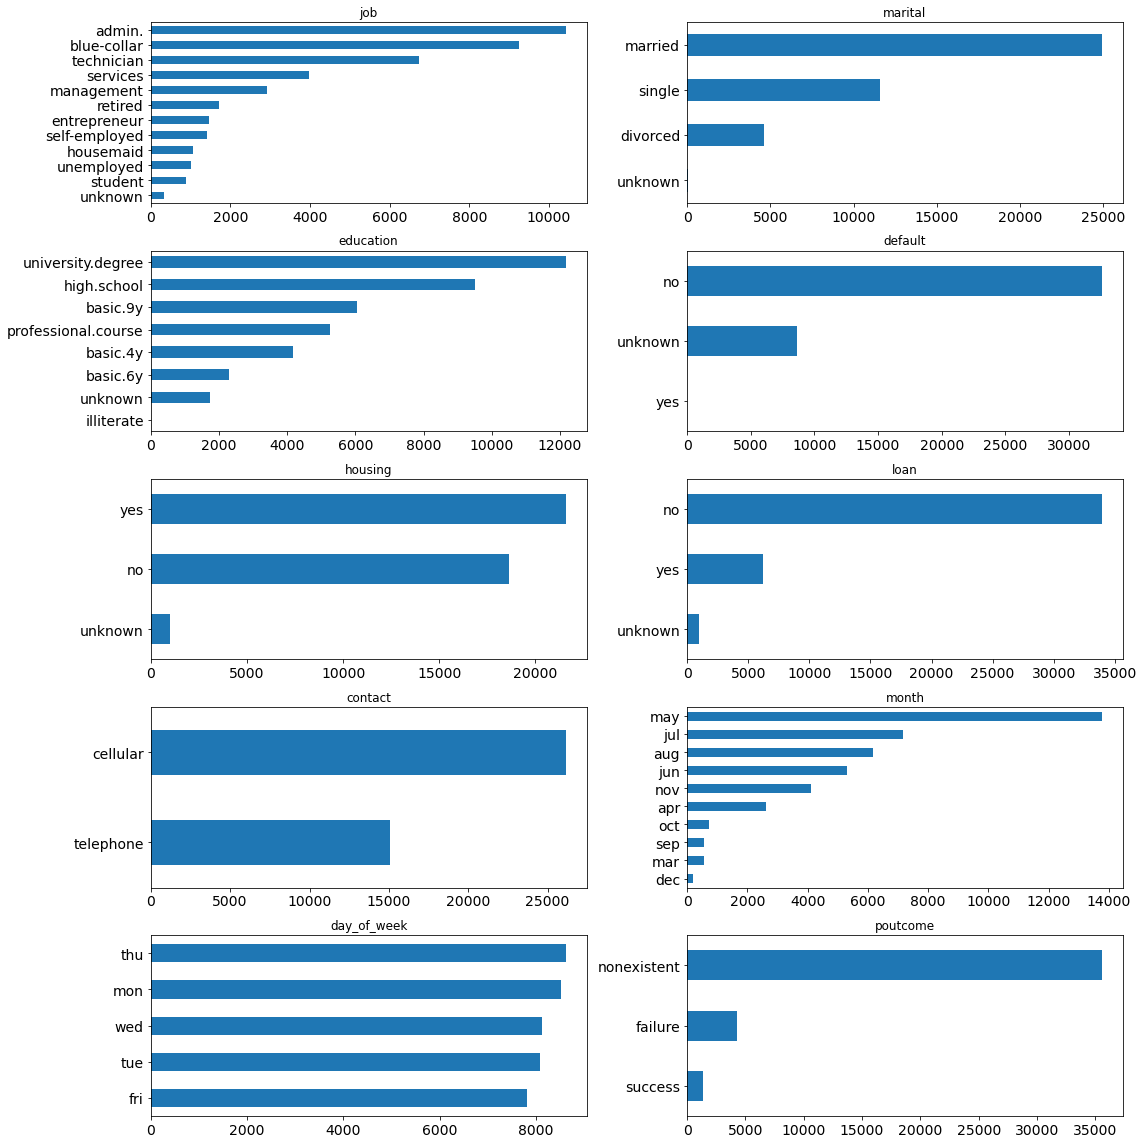

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(16,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[categorical_var]):
    data[c].value_counts()[::-1].plot(kind ='barh', ax=axes[i], title=c, fontsize=14)
    plt.pie
plt.tight_layout()

<AxesSubplot:ylabel='None'>

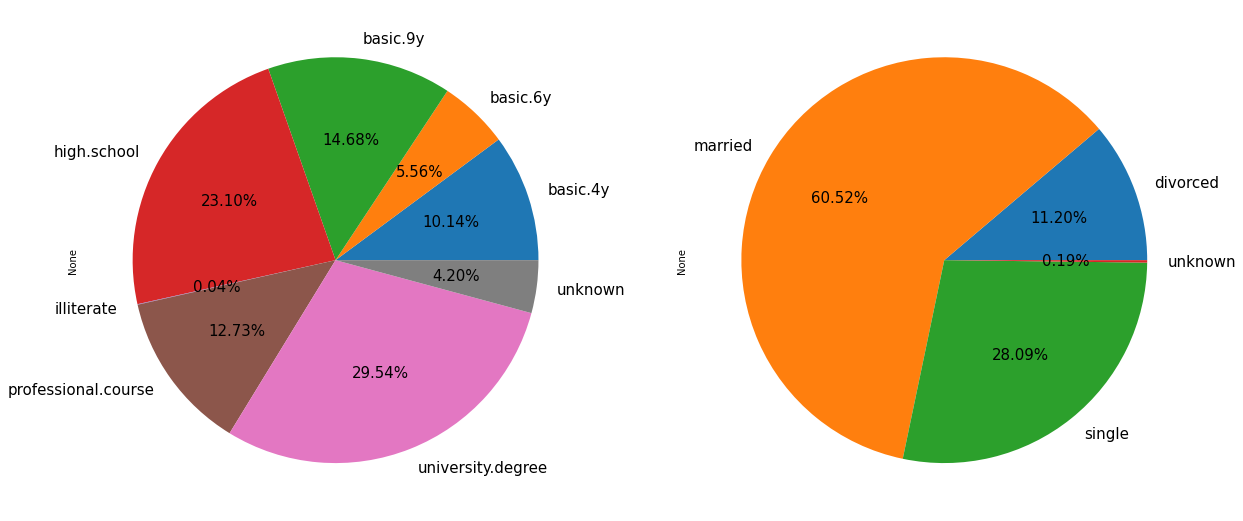

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20, 10))

data.groupby('education').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax1)

data.groupby('marital').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax2)

<AxesSubplot:ylabel='None'>

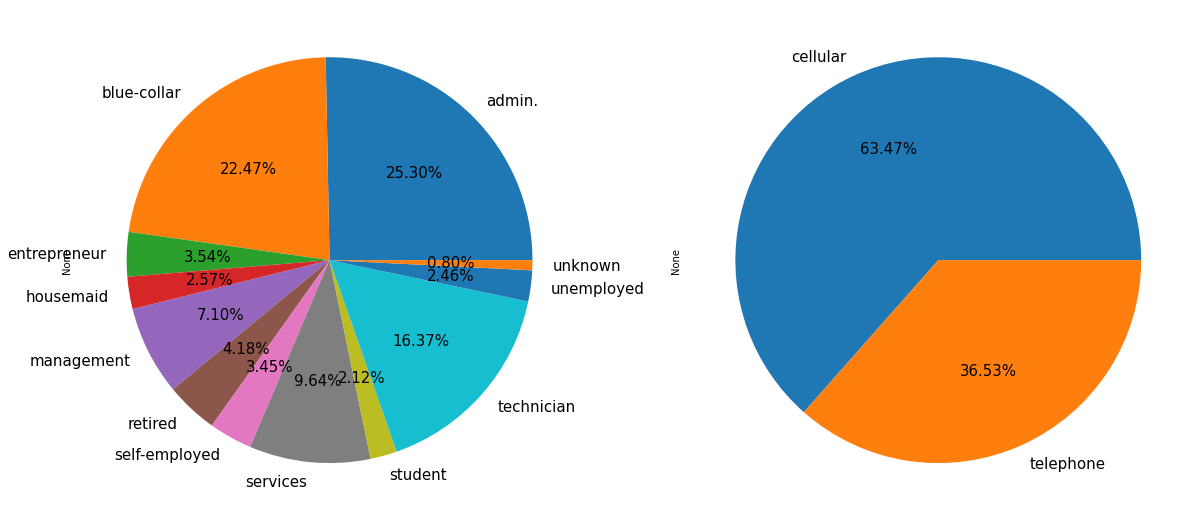

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20, 10))

data.groupby('job').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax1)

data.groupby('contact').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax2)

<AxesSubplot:ylabel='None'>

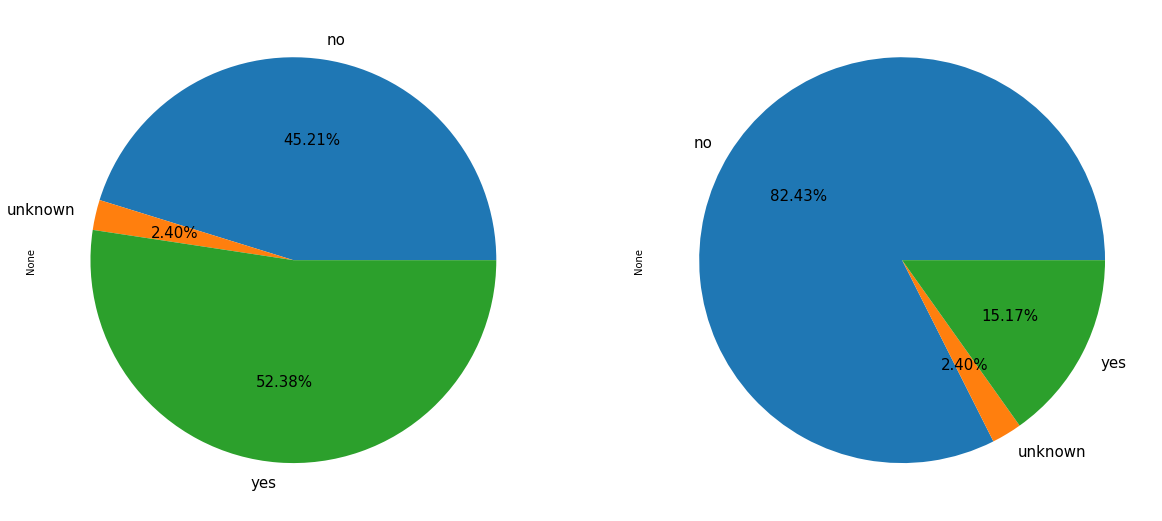

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20, 10))

data.groupby('housing').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax1)

data.groupby('loan').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax2)

<AxesSubplot:ylabel='None'>

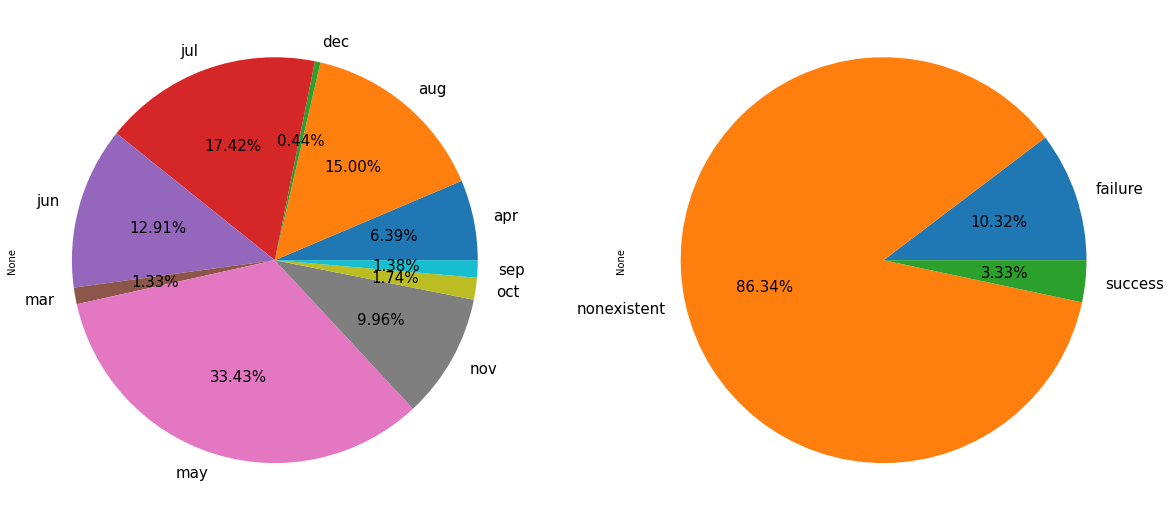

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20, 10))

data.groupby('month').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax1)

data.groupby('poutcome').size().plot(kind='pie', autopct='%0.2f%%', textprops={'fontsize': 15}, ax=ax2)

# Distribution of target variable.

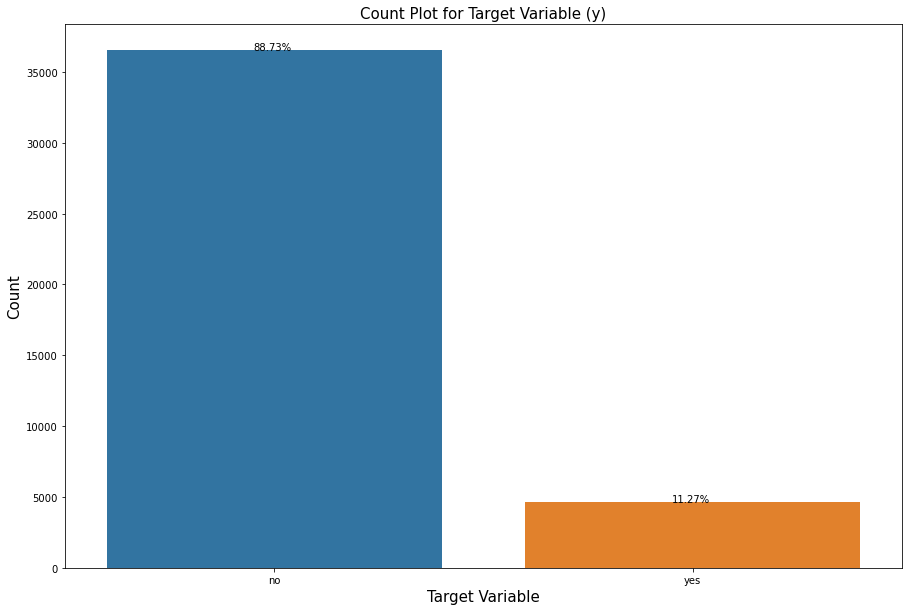

In [34]:
data_target = data['y'].copy()
data_target.value_counts()
sns.countplot(x = data_target)
plt.text(x = -0.05, y = data_target.value_counts()[0] + 1, s = str(round((data_target.value_counts()[0])*100/len(data_target),2)) + '%')
plt.text(x = 0.95, y = data_target.value_counts()[1] +1, s = str(round((data_target.value_counts()[1])*100/len(data_target),2)) + '%')
plt.title('Count Plot for Target Variable (y)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Univariate Analysis of Numarical Features

In [35]:
numarical_var=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

### Outlier analysis for numarical features

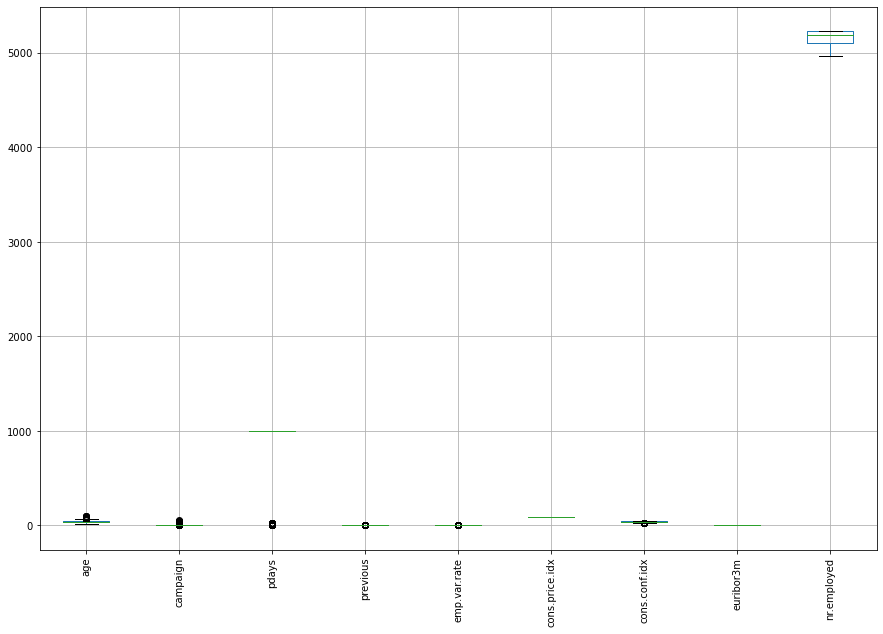

In [36]:
data.boxplot()
plt.xticks(rotation = 'vertical')
plt.show()

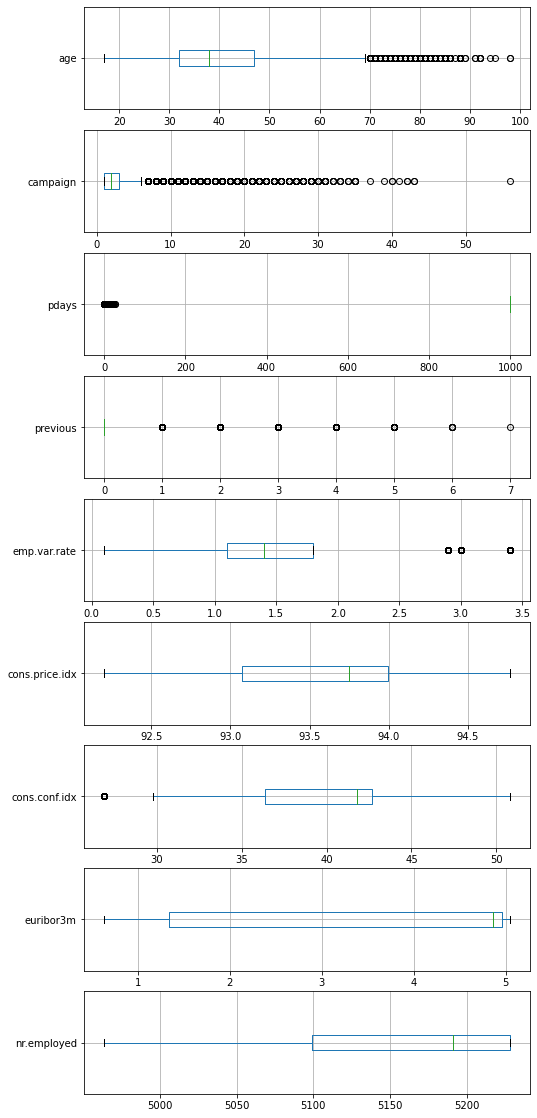

In [37]:
fig, axes = plt.subplots(9, 1, figsize=(8, 20))
for i, c in enumerate(numarical_var):
    data[[c]].boxplot(ax=axes[i], vert=False)

We can see some features are skewed and not normally distributed. The never contacted before respondents skew the variables “campaign” and “previous” towards zero.

The boxplot of pdays looks so strange because most records have pdays as 999. The distribution of the number of days since the previous campaign (“pdays”) is skewed towards 1,000 because, for the respondents who were never contacted, the value is 999. 

The other values of pdays are very small comaparitively.

# Distribution of numeric independent variables.

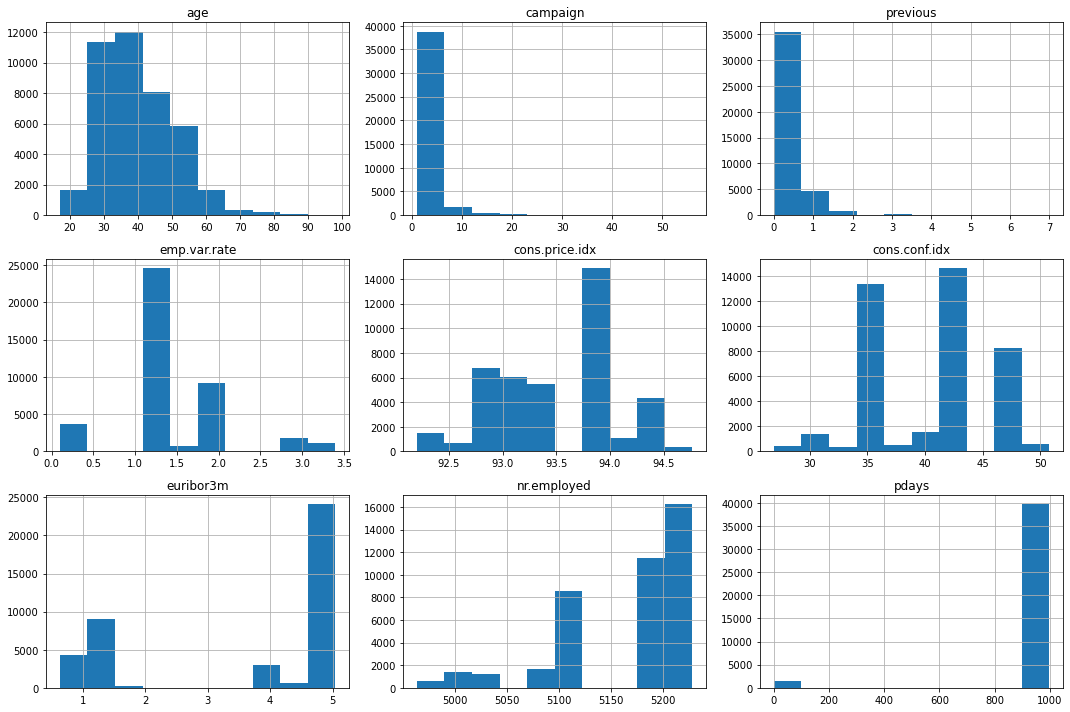

--------------------------------------------------------------------------------------------------------------
Skewness:


age               0.784697
campaign          4.762507
previous          3.832042
emp.var.rate      0.488341
cons.price.idx   -0.230888
cons.conf.idx    -0.303599
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [38]:
data[['age','campaign', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed','pdays']].hist()
plt.tight_layout()
plt.show()  
print('--------------------------------------------------------------------------------------------------------------')
print('Skewness:')
data[['age','campaign', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed']].skew()

# Bivariate Analysis: Relationships between Categorical variables with Target variable

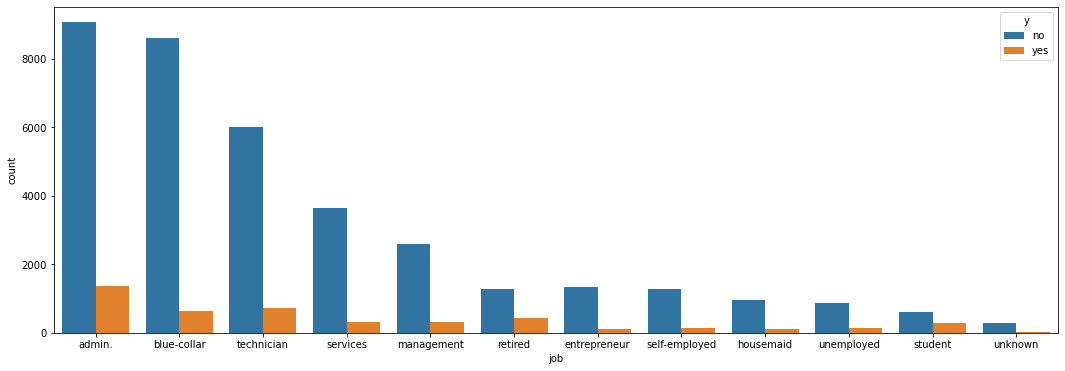

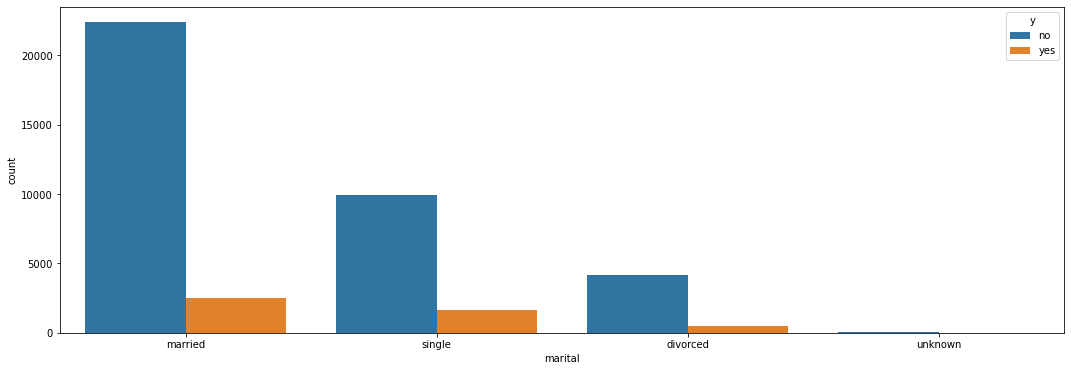

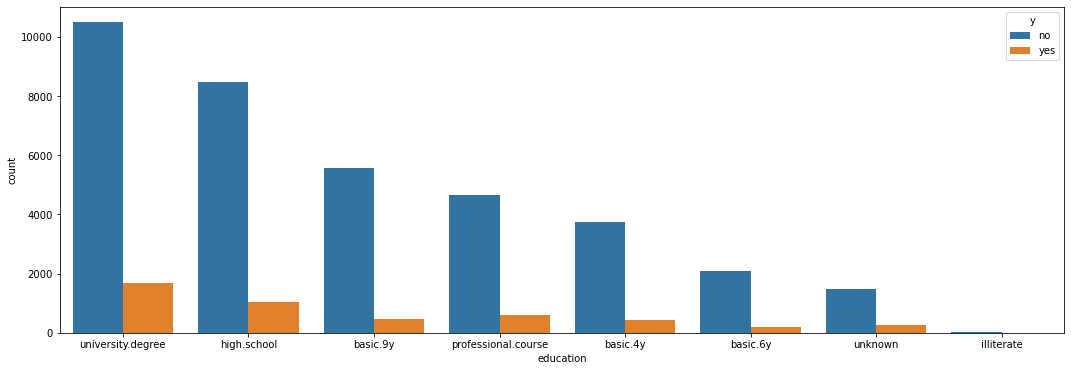

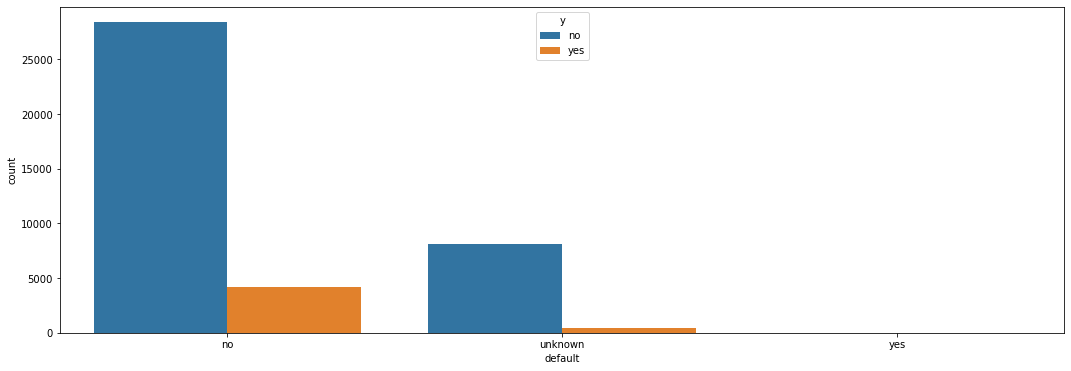

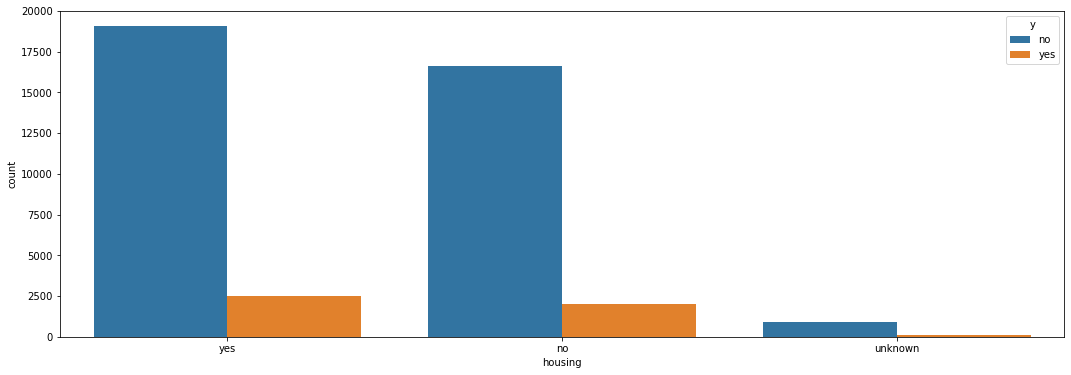

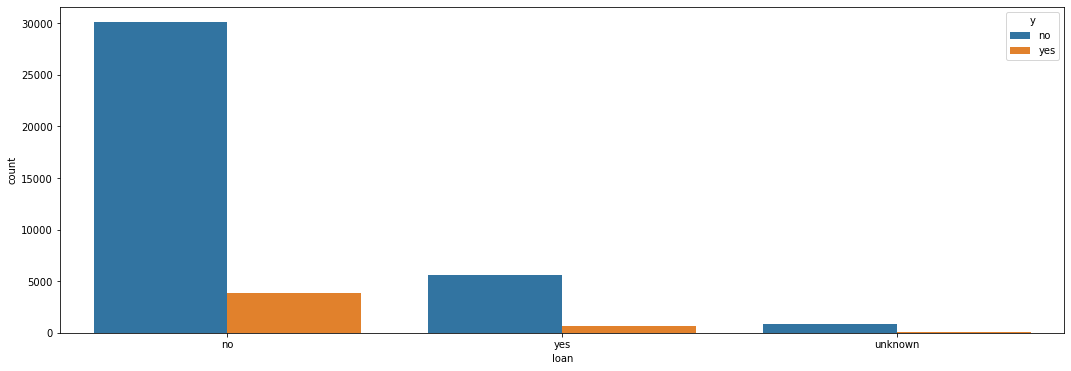

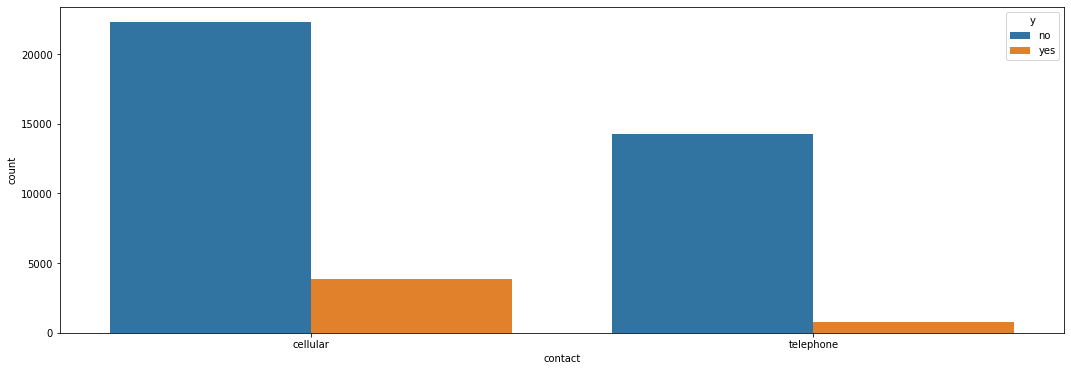

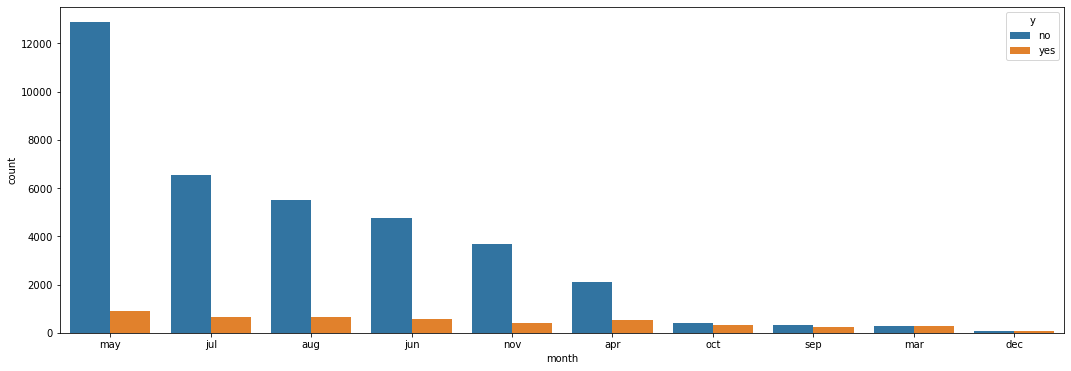

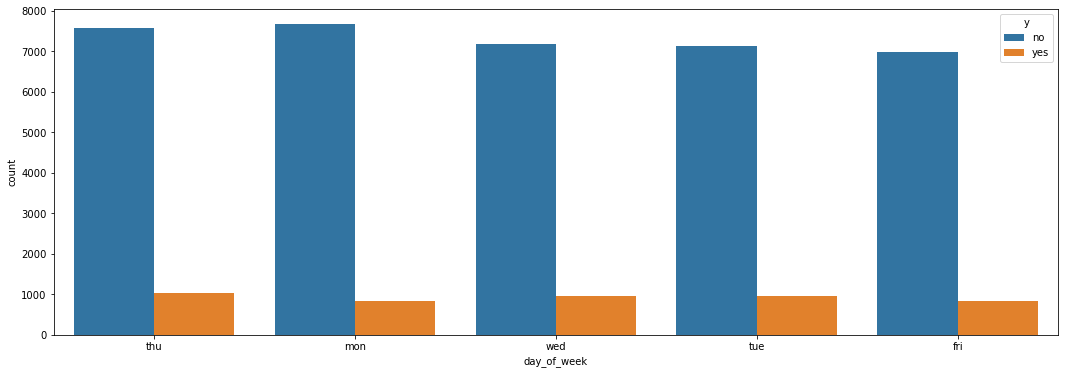

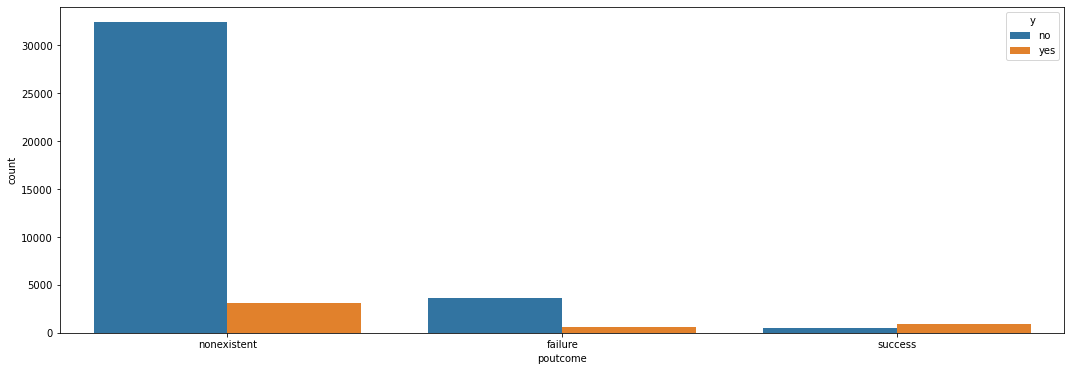

In [39]:
for c in categorical_var:
    plt.figure(figsize=(18,6)) 
    sns.countplot(x =c, hue='y',data = data,order = data[c].value_counts().index) 

# Target variable 'y' vs independent variable 'job'

In [40]:
data1= data.copy()

data1['y'] = data1['y'].replace(['no','yes'],[0,1])
data1.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = data1.groupby('job').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
total_people = data1.groupby('job').y.count().values


jobs = sorted(data1.job.unique()) 
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
8,student,275,875,31.400000
5,retired,434,1720,25.200000
10,unemployed,144,1014,14.200000
0,admin.,1352,10422,13.000000
4,management,328,2924,11.200000
11,unknown,37,330,11.200000
9,technician,730,6743,10.800000
6,self-employed,149,1421,10.500000
3,housemaid,106,1060,10.000000
2,entrepreneur,124,1456,8.500000


# Target variable 'y' vs independent variable 'marital'

In [41]:
married_subscribers = data1[(data1.marital=='married') ].y.sum()
single_subscribers = data1[(data1.marital=='single') | (data1.marital=='divorced')].y.sum() 

married_subscribers_prop = married_subscribers/len(data1[data1.marital=='married'])
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

print('Married clients campaign success rate: {0:.0f}%'.format(married_subscribers_prop*100))
print('Single clients campaign success rate: {0:.0f}%'.format(single_subscribers_prop*100))

No of Married clients who subscribe: 2532
No of Single (and divorced) clients who subscribe : 2096
Married clients campaign success rate: 10%
Single clients campaign success rate: 13%


# Bivariate Analysis: Relationships between Numarical variables with target variables

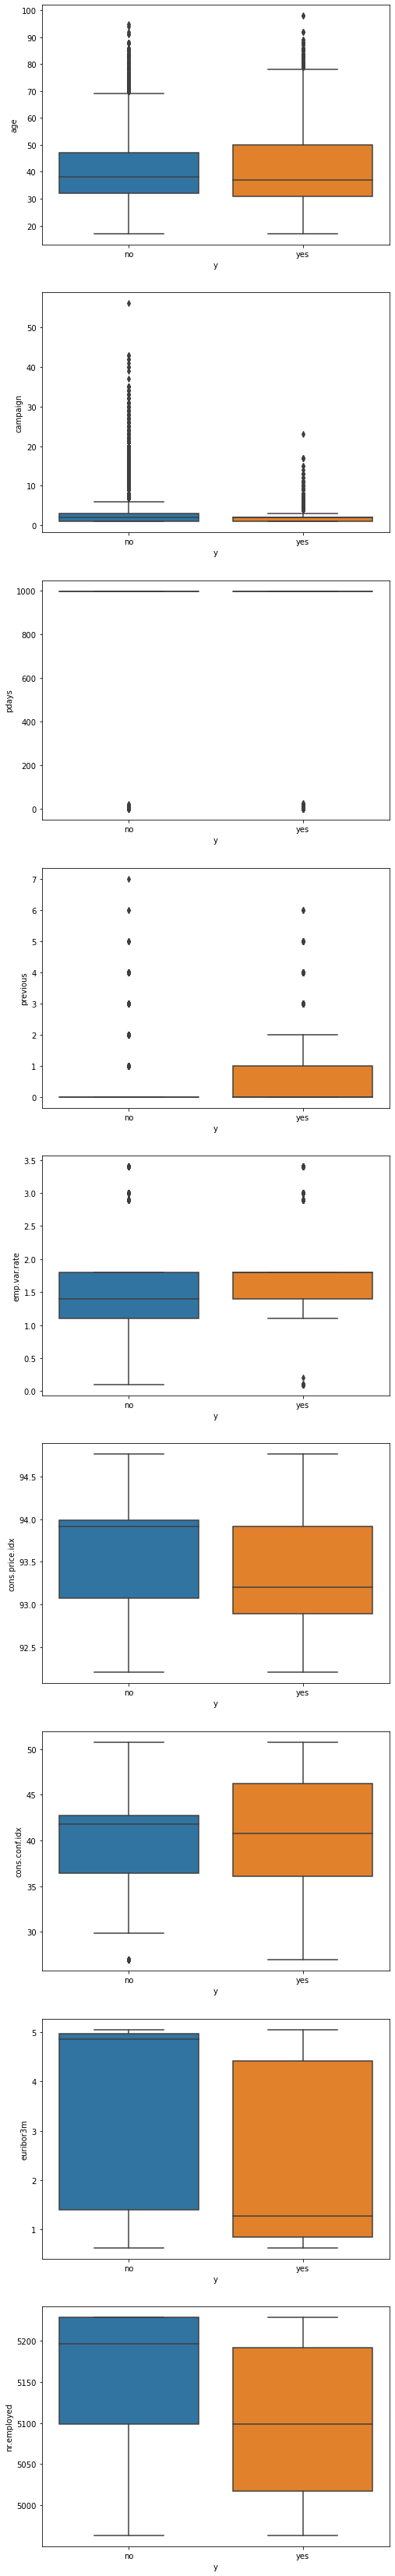

In [42]:
fig, axes = plt.subplots(9, 1, figsize=(8, 60))
for i, c in enumerate(numarical_var):
    sns.boxplot(data=data,x='y',y=c,ax=axes[i])  

# Bivariate Analysis - Correlation Heatmaps

<AxesSubplot:>

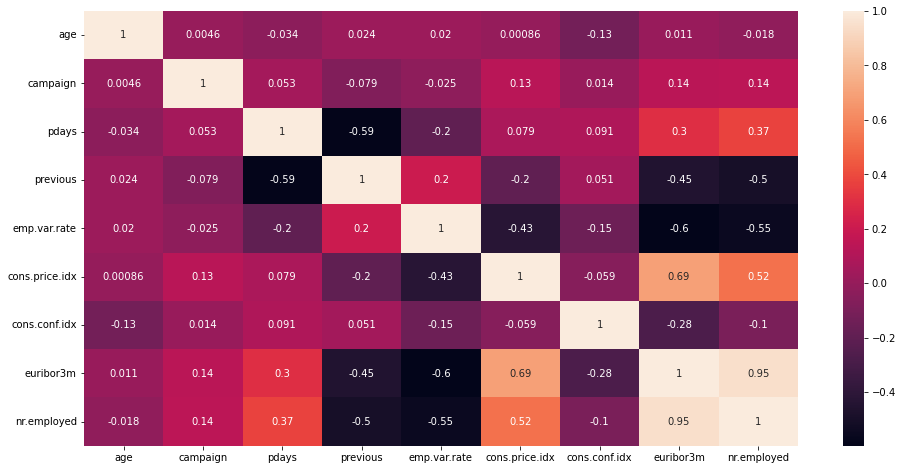

In [43]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[numarical_var].corr(), annot=True)

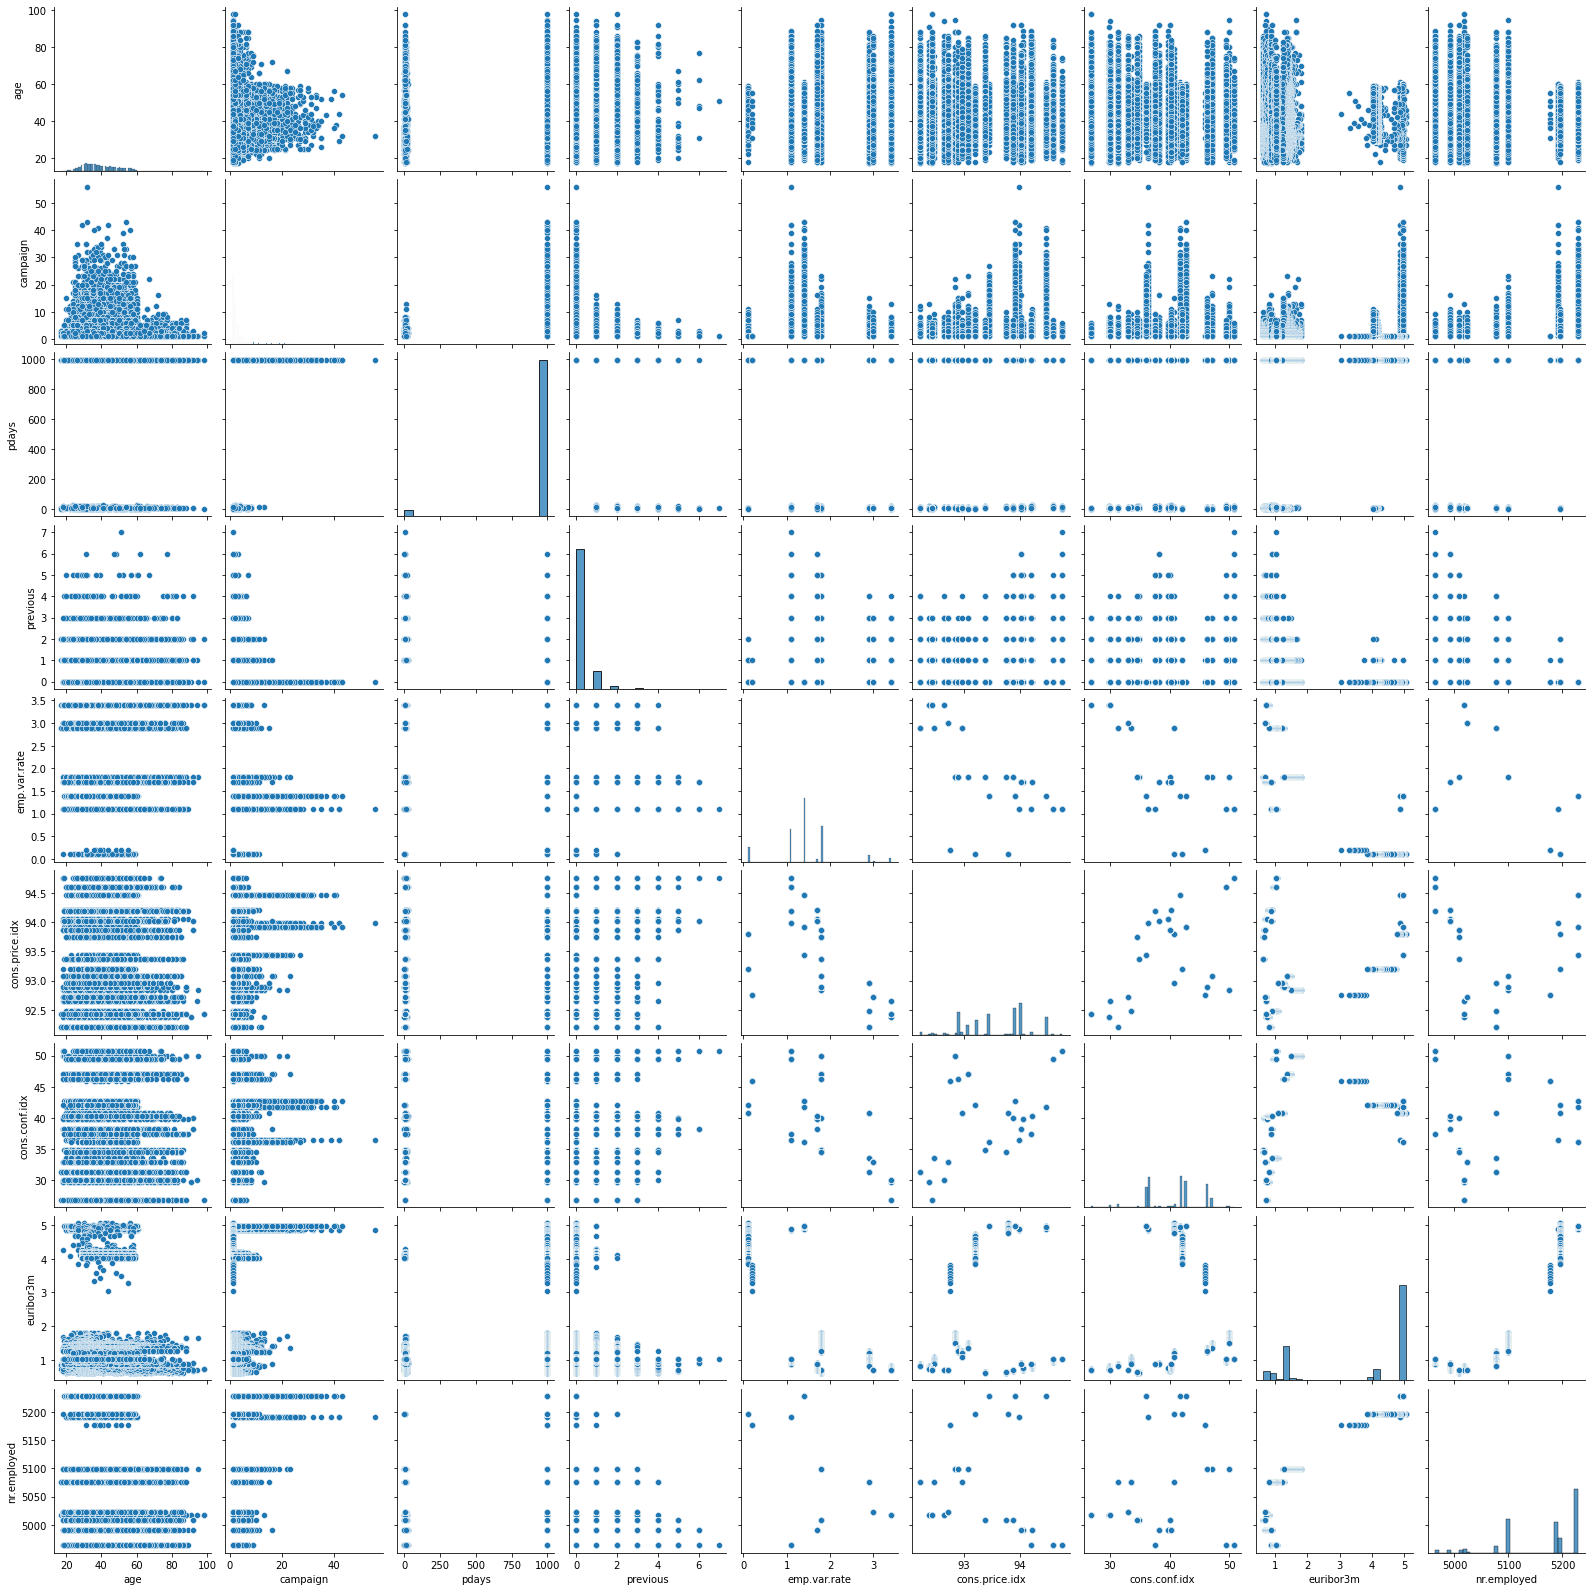

In [44]:
sns.pairplot(data)

# Feature Engineering

### 'pdays' feature

In [44]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

<AxesSubplot:xlabel='pdays', ylabel='count'>

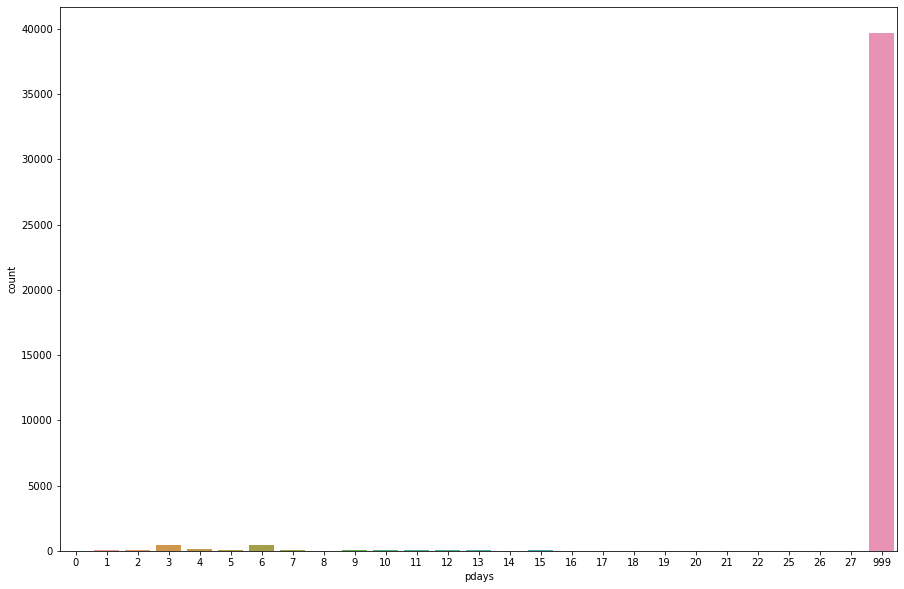

In [45]:
sns.countplot(x=data['pdays'])

In [30]:
data['has_contacted'] = np.where(data['pdays']!= 999, 'yes', 'no')

data.drop(['pdays'],axis=1,inplace=True)

data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,has_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.100000,93.994000,36.400000,4.857000,5191.000000,no,no


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

# SIGNIFICANT FEATURE SELECTION FOR MODEL BULIDING 

# Statistical test Analysis between independent variable vs dependent variables

## Chi2 statistical test for categorical variables 

### chisquare test

In [32]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

### Alpha = 0.05

# Indpendent Features 

In [33]:
data_feature = data.drop('y', axis = 1)

In [34]:
data_cat = data_feature.select_dtypes(include = [np.object])
data_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'has_contacted'],
      dtype='object')

# Target variable

In [35]:
data['y']=data['y'].map({'no':0,'yes':1})

In [36]:
data_target = data['y']

data_target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# Encoding for all categorical variables

### Since number of categories for each column is low, we can use OneHot Encoding.

In [37]:
data_dummy= pd.get_dummies(data=data_cat,drop_first = True)
data_dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,has_contacted_yes
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [38]:
from sklearn.feature_selection import chi2
f_p_values=chi2(data_dummy,data_target)

In [39]:
f_p_values

(array([1.76876859e+02, 1.10065113e+01, 1.69798200e+00, 6.71324420e-03,
        3.35662863e+02, 8.64507734e-01, 3.88322963e+01, 3.55864620e+02,
        1.30221961e+00, 8.74260253e+00, 9.37694452e-04, 3.06235474e+01,
        8.67995049e+01, 1.11617940e+00, 2.15110197e+01, 7.15924228e+01,
        1.75910549e+00, 2.16172373e+00, 3.61736953e-02, 7.36094532e+01,
        1.81205348e+01, 3.21320431e+02, 3.80868994e-01, 2.07141139e-01,
        2.70442815e+00, 2.07141139e-01, 6.96920402e-01, 5.47958309e+02,
        2.71895595e+00, 2.57887787e+02, 3.53330416e+01, 3.02405272e+00,
        8.42916583e+02, 3.21423320e+02, 5.16043932e+00, 7.63644573e+02,
        6.45541017e+02, 1.47750439e+01, 6.28141343e+00, 2.14277851e+00,
        1.31274314e+00, 2.10627558e+02, 3.98254806e+03, 4.18728158e+03]),
 array([2.33002751e-040, 9.07923726e-004, 1.92552099e-001, 9.34698887e-001,
        5.61615944e-075, 3.52480301e-001, 4.61823393e-010, 2.23905829e-079,
        2.53808184e-001, 3.10860535e-003, 9.75571159e-

## P_VALUES OF INDPENDENT VARIABLES 

In [40]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=data_dummy.columns
p_values.sort_values(ascending=True)

has_contacted_yes               0.000000
poutcome_success                0.000000
month_mar                       0.000000
month_oct                       0.000000
month_sep                       0.000000
contact_telephone               0.000000
job_student                     0.000000
job_retired                     0.000000
month_may                       0.000000
default_unknown                 0.000000
month_dec                       0.000000
poutcome_nonexistent            0.000000
job_blue-collar                 0.000000
marital_single                  0.000000
education_university.degree     0.000000
education_basic.9y              0.000000
job_services                    0.000000
month_jul                       0.000000
marital_married                 0.000000
education_basic.6y              0.000004
education_unknown               0.000021
day_of_week_mon                 0.000121
job_entrepreneur                0.000908
job_unemployed                  0.003109
day_of_week_thu 

## F_VALUES OF INDPENDENT VARIABLES

In [41]:
import pandas as pd
f_values=pd.Series(f_p_values[0])
f_values.index=data_dummy.columns
f_values.sort_values(ascending=False)

has_contacted_yes               4187.281579
poutcome_success                3982.548056
month_mar                        842.916583
month_oct                        763.644573
month_sep                        645.541017
contact_telephone                547.958309
job_student                      355.864620
job_retired                      335.662863
month_may                        321.423320
default_unknown                  321.320431
month_dec                        257.887787
poutcome_nonexistent             210.627558
job_blue-collar                  176.876859
marital_single                    86.799505
education_university.degree       73.609453
education_basic.9y                71.592423
job_services                      38.832296
month_jul                         35.333042
marital_married                   30.623547
education_basic.6y                21.511020
education_unknown                 18.120535
day_of_week_mon                   14.775044
job_entrepreneur                

## Interpretation : 
Based on P_VALUE & F_VALUE we will selecting the significunt features.

If P_value is less then 0.05 ---> Significunt features.

High f_value ------> Significunt features.

we will drop the variables have a P_value > 0.05 and low F_value from dataset for model building.

# Droping the Insignificant features from the data

In [42]:
data_cat_sig=data_dummy.drop(['job_unknown','job_management','education_professional.course','loan_unknown','housing_unknown','default_yes',
                'loan_yes','job_self-employed','marital_unknown','job_technician','day_of_week_wed','job_housemaid','education_high.school',
                'day_of_week_tue','education_illiterate','housing_yes','month_aug','month_jun'],axis=1)

In [43]:
data_cat_sig.head()

,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_university.degree,education_unknown,default_unknown,contact_telephone,month_dec,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,poutcome_nonexistent,poutcome_success,has_contacted_yes
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


# SelectKBest Algorithm for significant numarical variables

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
data_num = data_feature.select_dtypes(include = [np.number])
data_num.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [46]:
ordered_rank_features=SelectKBest(score_func=chi2,k=8)
ordered_feature=ordered_rank_features.fit(data_num,data_target)

In [47]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(data_num.columns)

In [48]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [49]:
features_rank.columns=['Features','Score']
features_rank.nlargest(8,'Score')

,Features,Score
7,nr.employed,5234.581603
6,euribor3m,3240.974082
2,previous,3090.172426
3,emp.var.rate,684.002961
1,campaign,541.971889
0,age,103.274145
5,cons.conf.idx,65.052380
4,cons.price.idx,2.736151


## Interpreation : 
K score of 'cons.price.idx' is less (2.73), so we concluding that, it is not significunt feature for the model.

### Scaling the Numarical features

In [50]:
X_scaler = StandardScaler()


num_scaled = X_scaler.fit_transform(data_num)


data_numarical_scaled = pd.DataFrame(num_scaled, columns = data_num.columns)

# Concatenate scaled numerical and dummy encoded categorical variables.

In [51]:
X = pd.concat([data_numarical_scaled, data_cat_sig], axis = 1)

X.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_university.degree,education_unknown,default_unknown,contact_telephone,month_dec,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,poutcome_nonexistent,poutcome_success,has_contacted_yes
0,1.533034,-0.565922,-0.349494,-0.524418,0.722722,-0.886585,0.712460,0.331680,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,1.628993,-0.565922,-0.349494,-0.524418,0.722722,-0.886585,0.712460,0.331680,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
2,-0.290186,-0.565922,-0.349494,-0.524418,0.722722,-0.886585,0.712460,0.331680,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,-0.002309,-0.565922,-0.349494,-0.524418,0.722722,-0.886585,0.712460,0.331680,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
4,1.533034,-0.565922,-0.349494,-0.524418,0.722722,-0.886585,0.712460,0.331680,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


# Train-Test Split

In [52]:
X = sm.add_constant(X)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, data_target, random_state = 10, test_size = 0.2)

In [54]:
print('X_train',X_train.shape)
print('Y_train',Y_train.shape)
print('X_test',X_test.shape)
print('Y_test',Y_test.shape)

X_train (32950, 35)
Y_train (32950,)
X_test (8238, 35)
Y_test (8238,)


In [55]:
Y_train.value_counts()

0    29238
1     3712
Name: y, dtype: int64

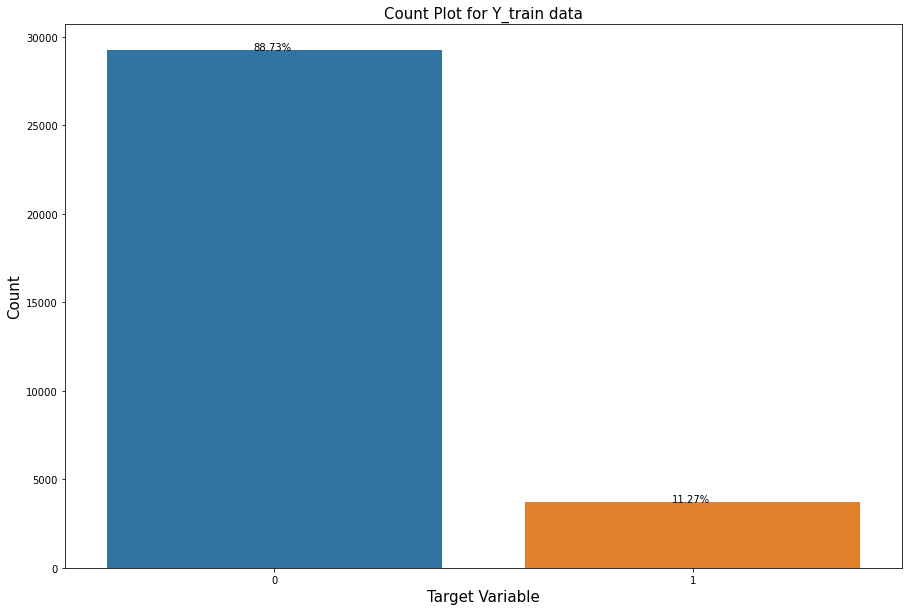

In [56]:
sns.countplot(Y_train)
plt.text(x = -0.05, y = Y_train.value_counts()[0] + 1, s = str(round((Y_train.value_counts()[0])*100/len(Y_train),2)) + '%')
plt.text(x = 0.95, y = Y_train.value_counts()[1] +1, s = str(round((Y_train.value_counts()[1])*100/len(Y_train),2)) + '%')
plt.title('Count Plot for Y_train data', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Handling Imbalanced

### Implementing Oversampling for Handling Imbalanced on Trian data

In [57]:
#conda install -c glemaitre imbalanced-learn

In [58]:
from imblearn.combine import SMOTEENN

In [59]:
smt=SMOTEENN()

In [60]:
X_train,Y_train=smt.fit_resample(X_train,Y_train)

In [61]:
X_train.shape,Y_train.shape

((44382, 35), (44382,))

In [62]:
Y_train.value_counts()

1    23136
0    21246
Name: y, dtype: int64

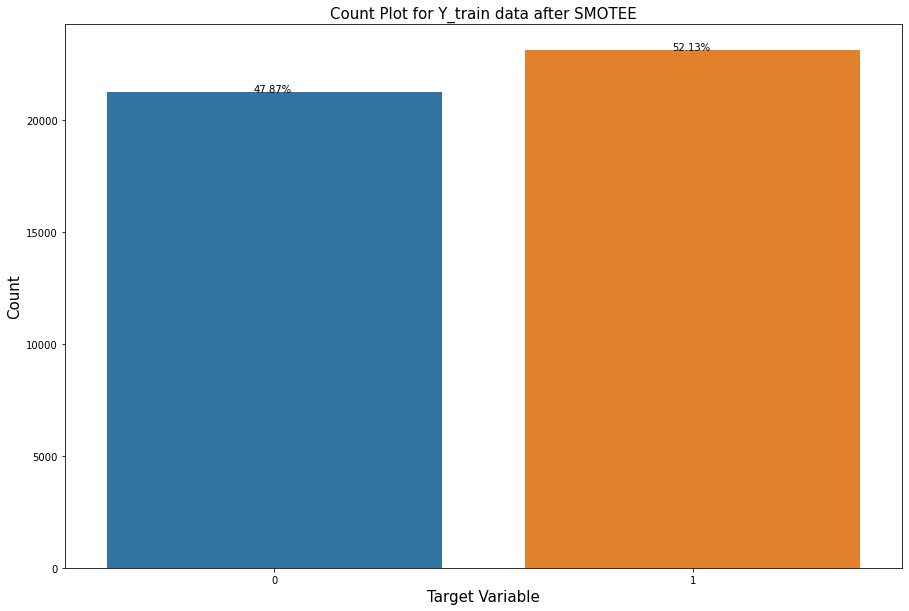

In [63]:
sns.countplot(Y_train)
plt.text(x = -0.05, y = Y_train.value_counts()[0] + 1, s = str(round((Y_train.value_counts()[0])*100/len(Y_train),2)) + '%')
plt.text(x = 0.95, y = Y_train.value_counts()[1] +1, s = str(round((Y_train.value_counts()[1])*100/len(Y_train),2)) + '%')
plt.title('Count Plot for Y_train data after SMOTEE', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# MODELS

In [64]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit
from sklearn.metrics import roc_auc_score

# ALGORITHM : 1

# 1.0 Stats Models : Logistic Regression

In [65]:
logreg = sm.Logit(Y_train, X_train)
result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.369898
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                44382
Model:                          Logit   Df Residuals:                    44347
Method:                           MLE   Df Model:                           34
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.4657
Time:                        20:10:51   Log-Likelihood:                -16417.
converged:                       True   LL-Null:                       -30723.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.5244      0.136      3.849      0.000       0.257       0.791
age                             0.0234      0.018      1.313      0.189      -0.012       0.058
campaign                       -0.0917      0.015     -5.914      0.000      -0.122      -0.061
previous                        0.0839      0.063      1.328      0.184      -0.040       0.208
emp.var.rate                    0.2222      0.053      4.226      0.000       0.119       0.325
cons.price.idx                  0.5240      0.056      9.359      0.000       0.414       0.634
cons.conf.idx                  -0.1675      0.048     -3.526      0.000      -0.261      -0.074
euribor3m                      -0.2951      0.195     -1.515      0.130      -0.677       0.087
nr.employed                    -1.2021      0.149     -8.082      0.000      -1.494      -0.911
job_blue-collar                -0.4772      0.042    -11.284      0.000      -0.560      -0.394
job_entrepreneur               -1.1163      0.104    -10.702      0.000      -1.321      -0.912
job_retired                    -0.1247      0.083     -1.509      0.131      -0.287       0.037
job_services                   -1.0896      0.057    -18.969      0.000      -1.202      -0.977
job_student                     0.0883      0.116      0.758      0.448      -0.140       0.317
job_unemployed                 -1.4472      0.137    -10.537      0.000      -1.716      -1.178
marital_married                -0.3521      0.042     -8.450      0.000      -0.434      -0.270
marital_single                 -0.3032      0.049     -6.241      0.000      -0.398      -0.208
education_basic.6y             -0.6714      0.078     -8.578      0.000      -0.825      -0.518
education_basic.9y             -0.5862      0.048    -12.105      0.000      -0.681      -0.491
education_university.degree    -0.4911      0.034    -14.546      0.000      -0.557      -0.425
education_unknown              -1.2647      0.100    -12.614      0.000      -1.461      -1.068
default_unknown                -0.7244      0.042    -17.141      0.000      -0.807      -0.642
contact_telephone              -0.9098      0.056    -16.163      0.000      -1.020      -0.799
month_dec                       1.2658      0.418      3.031      0.002       0.447       2.084
month_jul                       0.2232      0.058      3.841      0.000       0.109       0.337
month_mar                       2.6481      0.256     10.352      0.000       2.147       3.150
month_may                      -1.0556      0.048    -22.220      0.000      -1.149      -0.962
month_nov                       0.2588      0.111      2.336      0.019       0.042       0.476
month_oct                       2.2680      0.177     12.807      0.000       1.921       2.615
month_sep                      -0.5538      0.208     -2.658      0.008      -0.962      -0.145
day_of_week_mon                -0.8924      0.039    -22.677      0.000  

### 1.1 AIC (Akaike Information Criterion) value : Logistic Regression

In [66]:
print('AIC :',result.aic)

AIC : 32903.64314549656


### 1.2 Significant Features : Logistic Regression


In [67]:
significant_feat = pd.DataFrame()
significant_feat['Feature'] = X.columns
significant_feat['P_Value'] = result.pvalues.values
significant_feat[significant_feat['P_Value'] < 0.05]

,Feature,P_Value
0,const,0.000118
2,campaign,0.000000
4,emp.var.rate,0.000024
5,cons.price.idx,0.000000
6,cons.conf.idx,0.000422
8,nr.employed,0.000000
9,job_blue-collar,0.000000
10,job_entrepreneur,0.000000
12,job_services,0.000000
14,job_unemployed,0.000000


### 1.3 Predictions on the test set.

In [68]:
y_pred_prob = result.predict(X_test)

y_pred_prob.head()

29773   0.410466
14070   0.529210
39364   0.999474
29279   0.696932
11888   0.288650
dtype: float64

In [69]:
y_pred_prob_tr = result.predict(X_train)

In [70]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [71]:
y_pred_prob_tr= result.predict(X_train)

In [72]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_tr = [ 0 if x < 0.5 else 1 for x in y_pred_prob_tr]

### Confusion Matrix : Logistic Regression

### TRAIN DATA

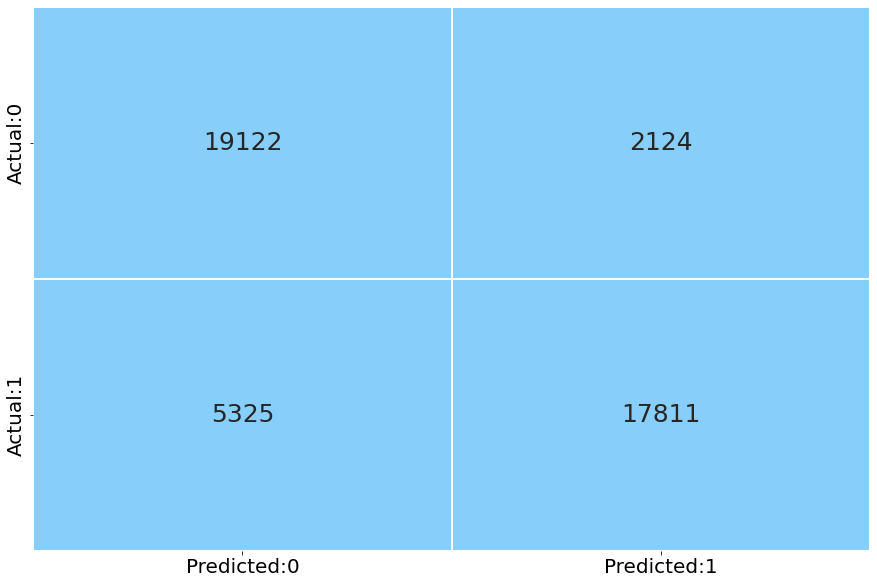

In [73]:
cm = confusion_matrix(Y_train, y_pred_tr)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)


plt.show()

### 1.4 Performance evaluation metrics : Confusion Matrix  Test data: Logistic Regression

### TEST DATA

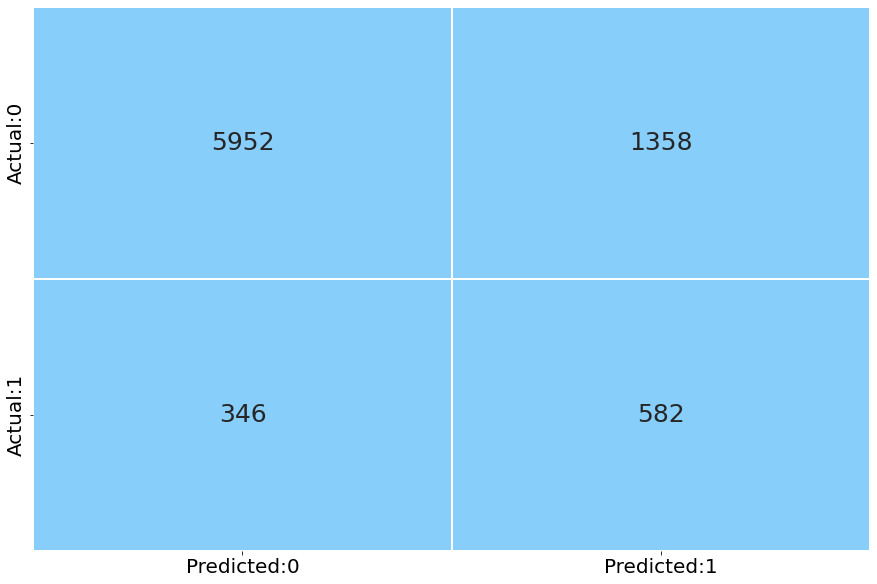

In [74]:
cm = confusion_matrix(Y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)


plt.show()

In [75]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [76]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 62.71551724137932
False Positive Rate: 18.57729138166895
True Negative Rate: 81.42270861833106
False Negative Rate: 37.28448275862069


### 1.5 Compute various performance metrics.



### Precision: It is defined as the ratio of true positives to the total positive predictions.

In [77]:
precision = TP / (TP+FP)

precision

0.3

### Recall: It is the ratio of true positives to the total actual positive observations. It is also known as, Sensitivity or True Positive Rate.

In [78]:
recall = TP / (TP+FN)
recall

0.6271551724137931

### Specificity: It is the ratio of true negatives to the total actual negative observations.

In [79]:
specificity = TN / (TN+FP)
specificity

0.8142270861833105

### f1-score: It is defined as the harmonic mean of precision and recall.

In [80]:
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.40585774058577406

### Accuracy:
It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [81]:
accuracy = (TN+TP) / (TN+FP+FN+TP)

accuracy

0.7931536780772032

In [82]:
acc_table = classification_report(Y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7310
           1       0.30      0.63      0.41       928

    accuracy                           0.79      8238
   macro avg       0.62      0.72      0.64      8238
weighted avg       0.87      0.79      0.82      8238



#### Kappa score: 
It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [83]:
kappa = cohen_kappa_score(Y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.29903169608384006


We got fair kappa score 

### 1.6 ROC curve.
ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

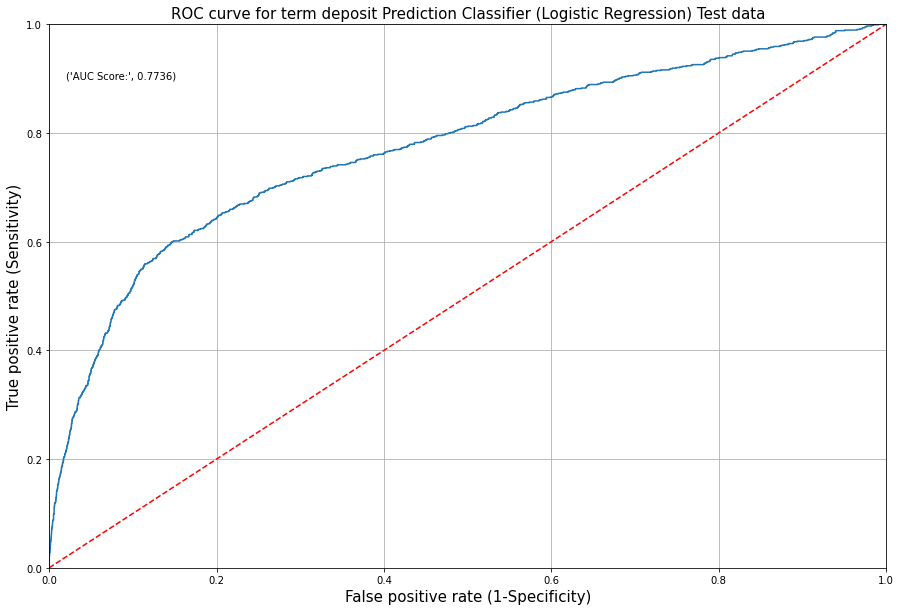

In [84]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)


plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for term deposit Prediction Classifier (Logistic Regression) Test data', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_prob),4)))
                               

plt.grid(True)

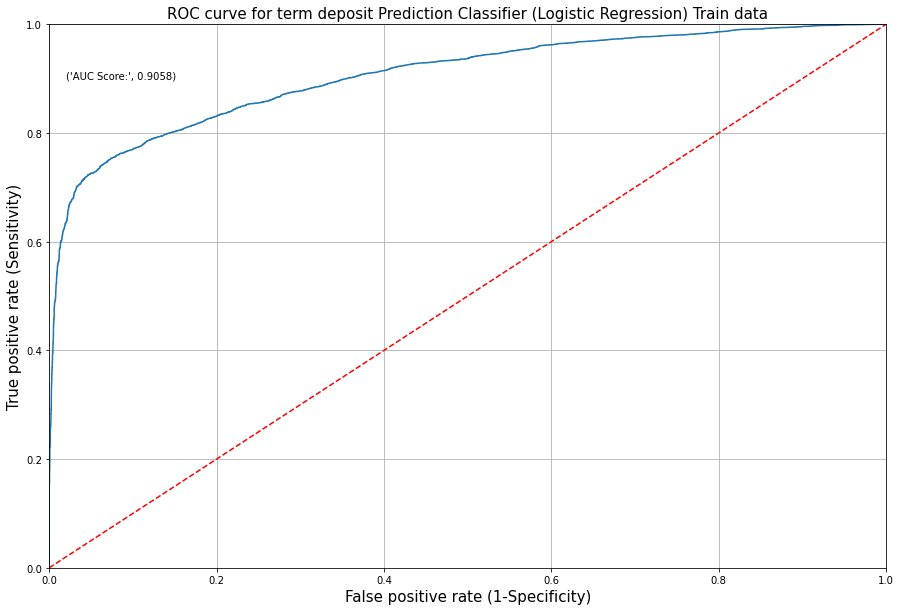

In [85]:
fpr, tpr, thresholds = roc_curve(Y_train, y_pred_prob_tr)


plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for term deposit Prediction Classifier (Logistic Regression) Train data', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_train, y_pred_prob_tr),4)))
                               

plt.grid(True)

### Interpretation: 
The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.7715.

### Create a generalized function to calculate the metrics for the train and the test set.


In [86]:
def get_train_report(model):
 
    train_pred = model.predict(X_train)

    return(classification_report(Y_train, train_pred))

In [87]:
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(Y_test, test_pred))

#### Create a generalized function to create a dataframe containing the scores for the models.

In [88]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model, cutoff):
    y_pred_prob = result.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(Y_test, y_pred),
                                    'Precision Score': metrics.precision_score(Y_test, y_pred),
                                    'Recall Score': metrics.recall_score(Y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(Y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(Y_test, y_pred),
                                    'f1-score': metrics.f1_score(Y_test, y_pred)}, 
                                    ignore_index = True)

### 1.7 Identifing the Best Cut-off Value

Tabulate the performance measures for different cut-offs.

The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

In [100]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for value in cutoff:
    update_score_card(result,value)

In [101]:
print('Score Card for Logistic regression:')
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.559995,0.127082,0.937500,0.267541,0.031712,0.223823
1,0.200000,0.636266,0.156878,0.857759,0.464676,0.092376,0.265245
2,0.300000,0.682525,0.196593,0.758621,0.623574,0.162392,0.312264
3,0.400000,0.715571,0.250097,0.696121,0.730639,0.242418,0.367986
4,0.500000,0.719066,0.298047,0.625000,0.791940,0.296264,0.403619
5,0.600000,0.724532,0.357379,0.581897,0.835033,0.352418,0.442804
6,0.700000,0.712239,0.394992,0.526940,0.855790,0.370457,0.451524
7,0.800000,0.700348,0.430221,0.481681,0.869750,0.380812,0.454499
8,0.900000,0.671071,0.456654,0.403017,0.878733,0.360632,0.428163


# 2.0 Logistic Regression

In [61]:
clf_lr=LogisticRegression()

In [62]:
clf_lr.fit(X_train,Y_train)

LogisticRegression()

### 2.1 Precicting for the train set and calculating the accuracy

In [63]:
y_pred_lr_trn=clf_lr.predict(X_train)

In [64]:
print(f'Train Accuracy = {accuracy_score(Y_train,y_pred_lr_trn)}')

Train Accuracy = 0.8313342484866215


### 2.2 Precicting for the test set and calculating the accuracy

In [65]:
y_pred_lr_tes=clf_lr.predict(X_test)

In [66]:
print(f'Test Accuracy = {accuracy_score(Y_test,y_pred_lr_tes)}')

Test Accuracy = 0.7915756251517359


### 2.3 classification report on train set

In [67]:
print(classification_report(Y_train,y_pred_lr_trn))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     21287
           1       0.89      0.77      0.83     23150

    accuracy                           0.83     44437
   macro avg       0.84      0.83      0.83     44437
weighted avg       0.84      0.83      0.83     44437



### 2.4 classification report on test set

In [68]:
print(classification_report(Y_test,y_pred_lr_tes))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7310
           1       0.30      0.63      0.41       928

    accuracy                           0.79      8238
   macro avg       0.62      0.72      0.64      8238
weighted avg       0.87      0.79      0.82      8238



### 2.5 Confusion Matrix : Logistic Regression

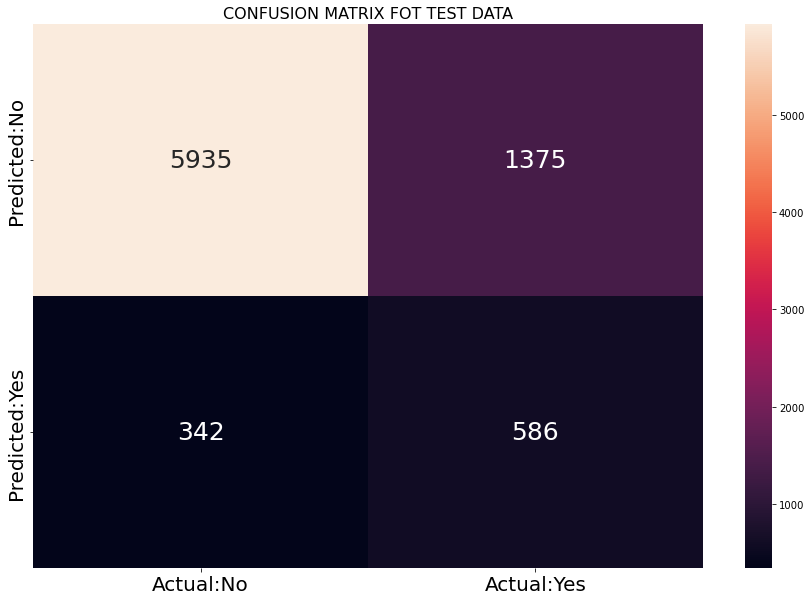

In [75]:
cm=confusion_matrix(Y_test,clf_lr.predict(X_test))
conf_mat=pd.DataFrame(data=cm,index=['Predicted:No','Predicted:Yes'],columns=['Actual:No','Actual:Yes'])
plt.title('CONFUSION MATRIX FOT TEST DATA',fontsize=16)
sns.heatmap(conf_mat,annot=True,fmt='d',annot_kws = {'size':25})


plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)


plt.show()
plt.show()

In [111]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [112]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 62.60775862068966
False Positive Rate: 18.549931600547197
True Negative Rate: 81.4500683994528
False Negative Rate: 37.39224137931034


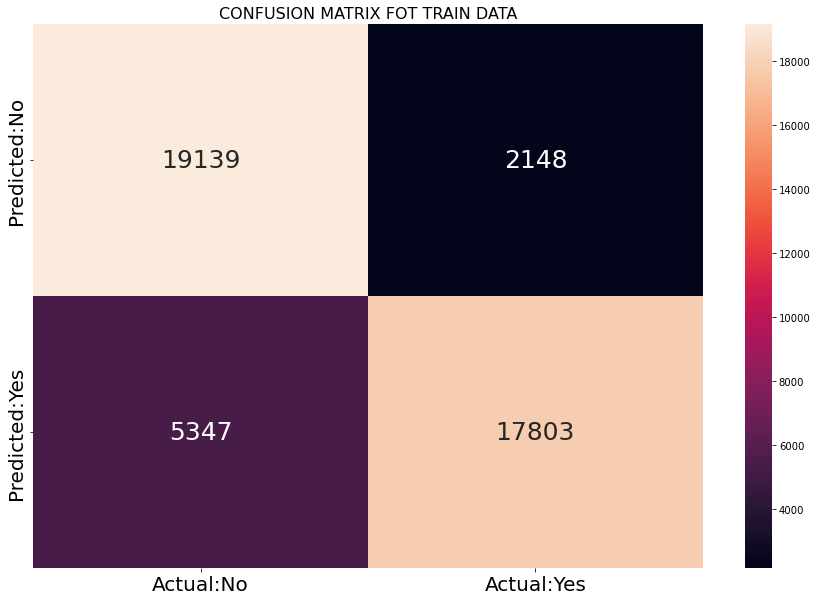

In [76]:
cm=confusion_matrix(Y_train,clf_lr.predict(X_train))
conf_mat=pd.DataFrame(data=cm,index=['Predicted:No','Predicted:Yes'],columns=['Actual:No','Actual:Yes'])
sns.heatmap(conf_mat,annot=True,fmt='d',annot_kws = {'size':25})

plt.title('CONFUSION MATRIX FOT TRAIN DATA',fontsize=16)
plt.xticks(fontsize = 20)


plt.yticks(fontsize = 20)


plt.show()


In [122]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [123]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 77.08584726771247
False Positive Rate: 9.855045180722891
True Negative Rate: 90.14495481927712
False Negative Rate: 22.914152732287537


## 2.6 Recursive Feature Elimination (RFE) : Logistic Regression

In the linear regression module, we learn about various techniques for selecting the significant features in the dataset. In this example, let us consider the RFE method for feature selection.

In [113]:
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 30)
rfe_model = rfe_model.fit(X_train, Y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['const', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_services',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'poutcome_nonexistent', 'poutcome_success',
       'has_contacted_yes'],
      dtype='object')


## 2.7 Build the Logisitc Regression model using the variables obtained from RFE

In [114]:
logreg_rfe = sm.Logit(Y_train, X_train[['const', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_services',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'poutcome_nonexistent', 'poutcome_success',
       'has_contacted_yes']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.372964
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                44476
Model:                          Logit   Df Residuals:                    44446
Method:                           MLE   Df Model:                           29
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:                  0.4612
Time:                        11:13:02   Log-Likelihood:                -16588.
converged:                       True   LL-Null:                       -30788.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7663      0.066     11.624      0.000   

### 2.8 AIC (Akaike Information Criterion) from RFE features


In [115]:
print('AIC:', logreg_rfe.aic)

AIC: 33235.91268232623


In [116]:
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_services',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'poutcome_nonexistent', 'poutcome_success',
       'has_contacted_yes']])
y_pred_prob_rfe.head()

29773   0.405915
14070   0.531949
39364   0.999410
29279   0.678620
11888   0.383852
dtype: float64

In [117]:
y_pred_prob_rfe_train = logreg_rfe.predict(X_train[['const', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_services',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'poutcome_nonexistent', 'poutcome_success',
       'has_contacted_yes']])
y_pred_prob_rfe_train.head()

0   0.092386
1   0.344066
2   0.316714
3   0.146216
4   0.530844
dtype: float64

In [118]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.6 else 1 for x in y_pred_prob_rfe]

### 2.9 Confusion Matrix : Logisitc Regression(RFE)

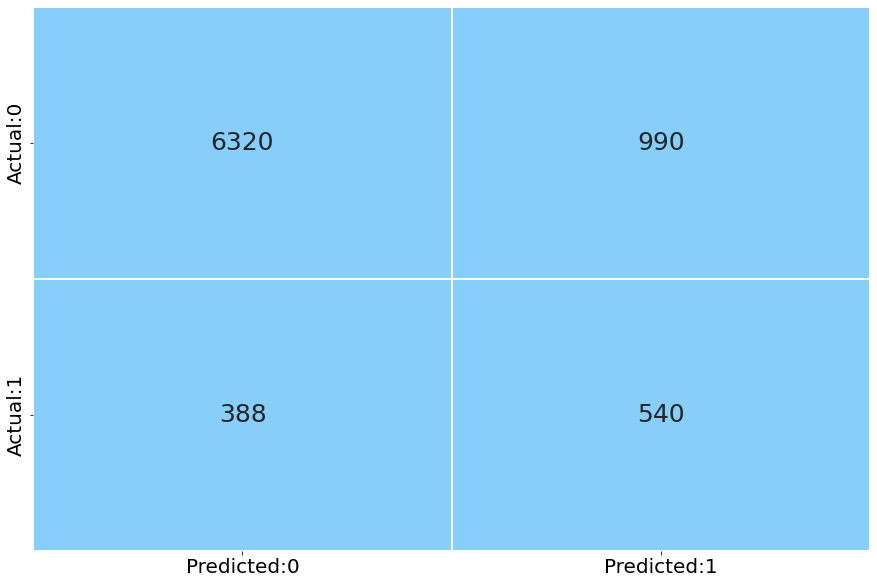

In [119]:
cm = confusion_matrix(Y_test, y_pred_rfe)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)


plt.show()

In [120]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [121]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 58.189655172413794
False Positive Rate: 13.543091655266759
True Negative Rate: 86.45690834473324
False Negative Rate: 41.810344827586206


### 2.10 Performance Measures : Logisitc Regression(RFE)

### Precision

In [122]:
precision_lr = TP / (TP+FP)

precision_lr

0.35294117647058826

### Recall

In [123]:
recall_lr = TP / (TP+FN)
recall_lr

0.5818965517241379

### Specificity

In [124]:
specificity_lr = TN / (TN+FP)
specificity_lr

0.8645690834473324

### f1_score

In [125]:
f1_score_lr = 2*((precision_lr*recall_lr)/(precision_lr+recall_lr))
f1_score_lr

0.43938161106590723

### Accuracy

In [126]:
accuracy_lr = (TN+TP) / (TN+FP+FN+TP)

accuracy_lr

0.8327263899004613

In [127]:
result = classification_report(Y_test, y_pred_rfe)

print(result)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7310
           1       0.35      0.58      0.44       928

    accuracy                           0.83      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.83      0.85      8238



#### Interpreation :
After applying Logistic Regression with RFE method Precision,recall,f1-score and accuracy improved 

In [128]:
ROC_AUC_SCORE_LR_TEST=roc_auc_score(Y_test, y_pred_rfe)
print('ROC_AUC_SCORE_LR_TEST:',ROC_AUC_SCORE_LR_TEST)

ROC_AUC_SCORE_LR_TEST: 0.7232328175857352


In [129]:
ROC_AUC_SCORE_LR_TRAIN=roc_auc_score(Y_train, y_pred_prob_rfe_train)
print('ROC_AUC_SCORE_LR_TRAIN:',ROC_AUC_SCORE_LR_TRAIN)

ROC_AUC_SCORE_LR_TRAIN: 0.9036801372881089


### 2.11 Cohen kappa score for Logistic Regression with RFE method

In [130]:
kappa = cohen_kappa_score(Y_test, y_pred_rfe)

print('kappa value:',kappa)

kappa value: 0.3479376913198926


### Interpreation :
After applying Logistic Regression with RFE method the cohen kappa score incresed from 0.26 to 0.34

# ALGORITHM : 3

# 3.1 Decision Tree for Classification

In [89]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, Y_train)

In [90]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

predicted_value_te = model.predict(X_test)
print(predicted_value_te)
predicted_value_tr = model.predict(X_train)
print(predicted_value_tr)

[0 0 1 ... 0 0 0]
[0 0 0 ... 1 1 1]


In [129]:
X_train.columns

Index(['const', 'age', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_services',
       'job_student', 'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'poutcome_nonexistent', 'poutcome_success',
       'has_contacted_yes'],
      dtype='object')

In [130]:
import pydotplus
from IPython.display import Image  

In [133]:
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)

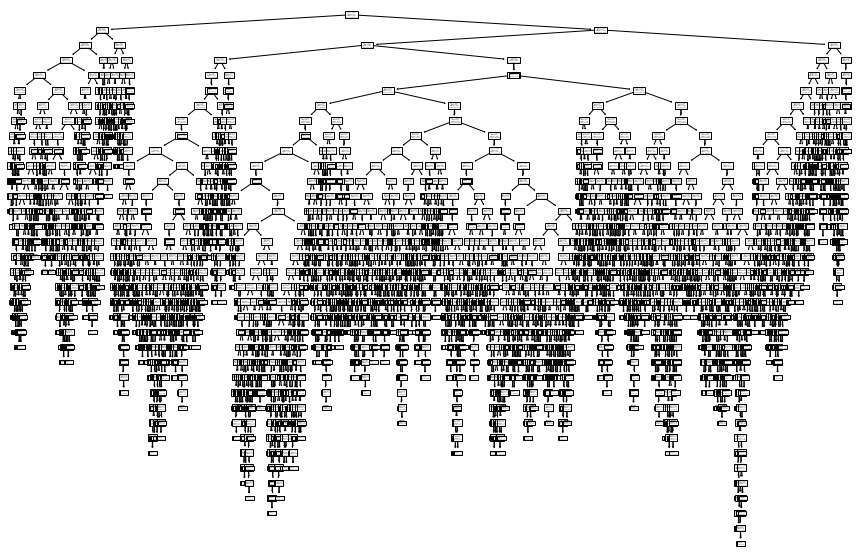

In [135]:
tree.plot_tree(clf)
plt.show()

### 3.2 Performance measures on the train set.

In [91]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84     21246
           1       0.94      0.71      0.81     23136

    accuracy                           0.82     44382
   macro avg       0.84      0.83      0.82     44382
weighted avg       0.85      0.82      0.82     44382



### 3.3 Performance measures on the test set.

In [92]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7310
           1       0.36      0.59      0.45       928

    accuracy                           0.84      8238
   macro avg       0.65      0.73      0.68      8238
weighted avg       0.88      0.84      0.85      8238



### Interpretation:
From the above output, we can see that there is a little difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fitted on the train data.

If we tune the hyperparameters and we bulid the decision tree with RFE, it helps to avoid the over-fitting of the tree.

### 3.4 Confusion Matrix : Decision Tree

### TEST DATA

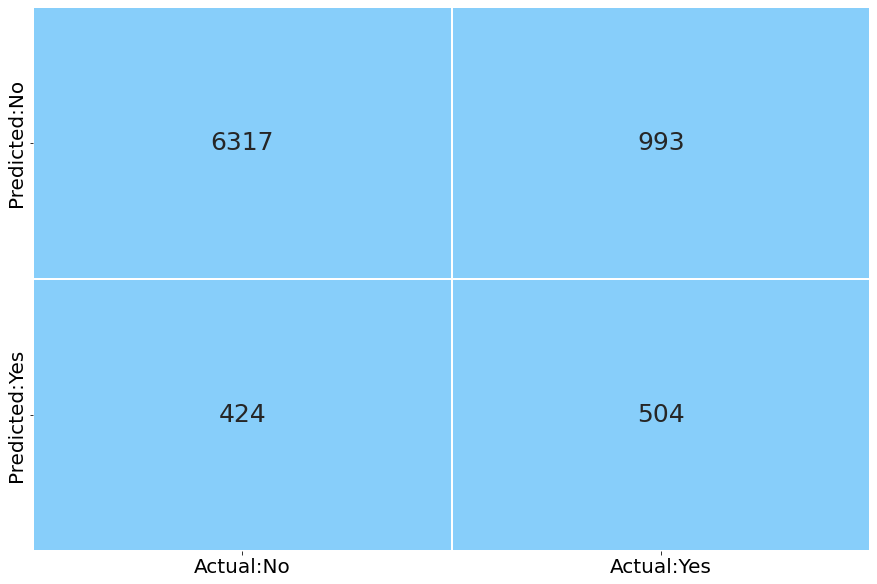

In [97]:
cm = confusion_matrix(Y_test, predicted_value_te)
conf_matrix = pd.DataFrame(data = cm,index=['Predicted:No','Predicted:Yes'],columns=['Actual:No','Actual:Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Performance Metrics : Decision Tree

In [94]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [95]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 54.310344827586206
False Positive Rate: 13.584131326949384
True Negative Rate: 86.41586867305061
False Negative Rate: 45.689655172413794


### TRAIN DATA

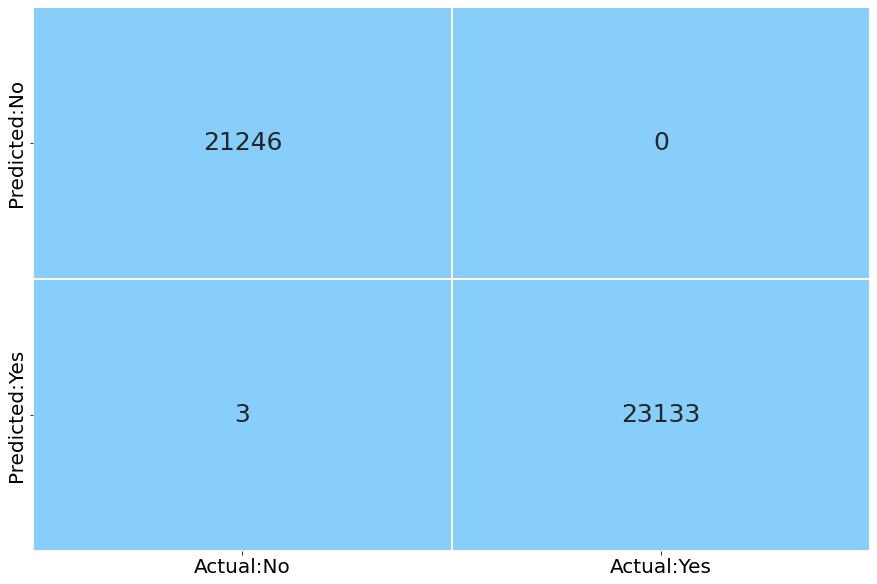

In [98]:
cm = confusion_matrix(Y_train, predicted_value_tr)
conf_matrix = pd.DataFrame(data = cm,index=['Predicted:No','Predicted:Yes'],columns=['Actual:No','Actual:Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [99]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [100]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 99.98703319502074
False Positive Rate: 0.0
True Negative Rate: 100.0
False Negative Rate: 0.012966804979253113


In [101]:
result = classification_report(Y_test, predicted_value_te)

print(result)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7310
           1       0.34      0.54      0.42       928

    accuracy                           0.83      8238
   macro avg       0.64      0.70      0.66      8238
weighted avg       0.87      0.83      0.84      8238



### Precision

In [102]:
precision_dt = TP / (TP+FP)

precision_dt

1.0

### Recall

In [103]:
recall_dt = TP / (TP+FN)
recall_dt

0.9998703319502075

### Specificity

In [104]:
specificity_dt = TN / (TN+FP)
specificity_dt

1.0

### f1 score

In [105]:
f1_score_dt = 2*((precision_dt*recall_dt)/(precision_dt+recall_dt))
f1_score_dt

0.9999351617713804

### Accuracy

In [106]:
accuracy_dt = (TN+TP) / (TN+FP+FN+TP)

accuracy_dt

0.9999324050290659

## ROC CURVE : Decision Tree

In [108]:
ROC_AUC_SCORE_DT_TEST=roc_auc_score(Y_test, predicted_value_te)
print('ROC_AUC_SCORE_DT_TEST:',ROC_AUC_SCORE_DT_TEST)

ROC_AUC_SCORE_DT_TEST: 0.7036310675031842


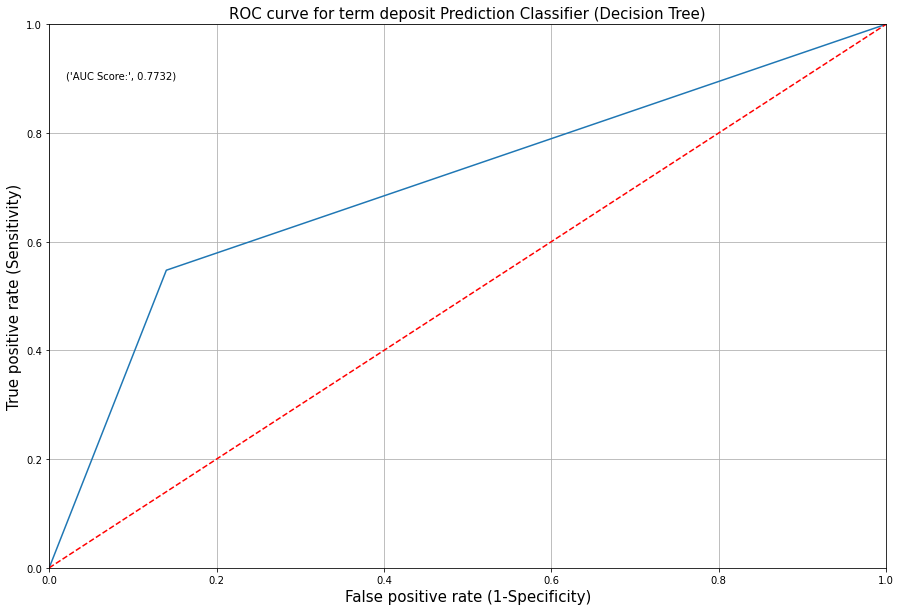

In [143]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_value)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for term deposit Prediction Classifier (Decision Tree)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_prob),4)))
plt.grid(True)

### 3.5 Decision Tree with RFE method : Feature Selection

In [116]:
rfe_model = RFE(estimator = decision_tree_classification, n_features_to_select = 20)
rfe_model = rfe_model.fit(X_train, Y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_retired', 'job_services', 'job_student',
       'job_unemployed', 'marital_married', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon'],
      dtype='object')


### 3.5 Build the Decision Tree model using the variables obtained from RFE

In [117]:
X_train_new_dr=X_train[['cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_retired', 'job_services', 'job_student',
       'job_unemployed', 'marital_married', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon']]

In [118]:
X_test_new_dr=X_test[['cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_retired', 'job_services', 'job_student',
       'job_unemployed', 'marital_married', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon']]

In [119]:
decision_tree = decision_tree_classification.fit(X_train_new_dr, Y_train)

In [120]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_new_dr, Y_train)
 
predicted_value_dr_te = model.predict(X_test_new_dr)
predicted_value_dr_tr = model.predict(X_train_new_dr)


### 3.6 Performance measures on the test set with RFE method.

In [121]:
result = classification_report(Y_test, predicted_value_dr_te)

print(result)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7310
           1       0.40      0.52      0.45       928

    accuracy                           0.86      8238
   macro avg       0.67      0.71      0.69      8238
weighted avg       0.88      0.86      0.87      8238



In [122]:
result = classification_report(Y_train, predicted_value_dr_tr)

print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     21246
           1       0.98      0.92      0.95     23136

    accuracy                           0.95     44382
   macro avg       0.95      0.95      0.95     44382
weighted avg       0.95      0.95      0.95     44382



In [123]:
ROC_AUC_SCORE_DT_TEST=roc_auc_score(Y_test, predicted_value_dr_te)
print('ROC_AUC_SCORE_DT_TEST:',ROC_AUC_SCORE_DT_TEST)

ROC_AUC_SCORE_DT_TEST: 0.7101170750978819


In [124]:
ROC_AUC_SCORE_DT_TRAIN=roc_auc_score(Y_train, predicted_value_dr_tr)
print('ROC_AUC_SCORE_DT_TRAIN:',ROC_AUC_SCORE_DT_TRAIN)

ROC_AUC_SCORE_DT_TRAIN: 0.9479088362935195


In [125]:
print('ROC_AUC_SCORE_DT_TEST:',ROC_AUC_SCORE_DT_TEST)
print('ROC_AUC_SCORE_DT_TRAIN:',ROC_AUC_SCORE_DT_TRAIN)

ROC_AUC_SCORE_DT_TEST: 0.7101170750978819
ROC_AUC_SCORE_DT_TRAIN: 0.9479088362935195


# ALGORITHM : 4

# 4.0 Random Forest for Classification

In [61]:
rf_classification = RandomForestClassifier(n_estimators = 10,criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
rf_model = rf_classification.fit(X_train, Y_train)

In [62]:
y_pre_rfc=rf_model.predict(X_test)

In [63]:
y_pre_rfc_train=rf_model.predict(X_train)

### 4.2 Confusion Matrix : Random Forest for Classification

### Test data

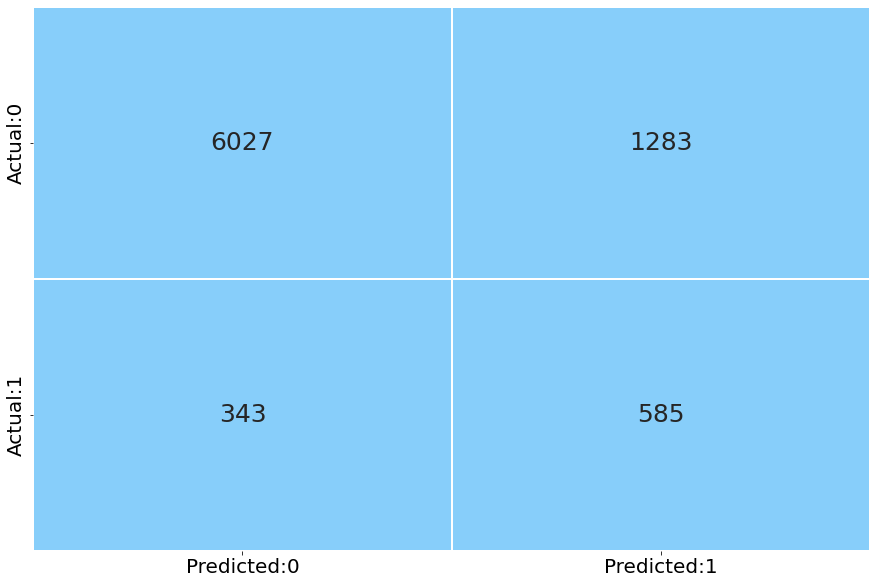

In [152]:
cm = confusion_matrix(Y_test, y_pre_rfc)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Performance Metrics : Random Forest

In [153]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [154]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 63.03879310344828
False Positive Rate: 17.551299589603282
True Negative Rate: 82.44870041039671
False Negative Rate: 36.96120689655172


### Train data

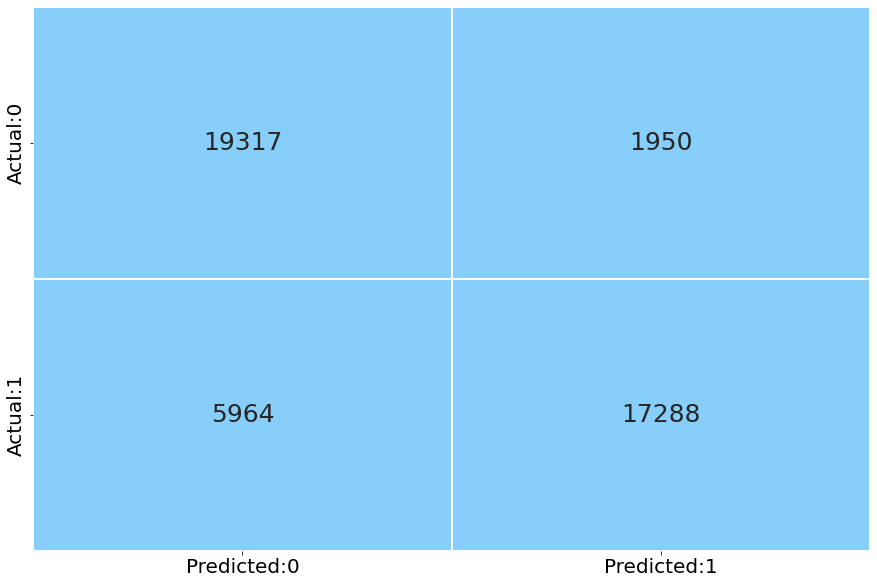

In [358]:
cm = confusion_matrix(Y_train, y_pre_rfc_train)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [359]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [360]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 74.35059349733356
False Positive Rate: 9.169135280011286
True Negative Rate: 90.83086471998871
False Negative Rate: 25.649406502666437


### 4.1 Performance measures on the train set.

In [155]:
train_report = get_train_report(rf_model)

print(train_report) 

              precision    recall  f1-score   support

           0       0.76      0.91      0.83     21286
           1       0.90      0.74      0.81     23236

    accuracy                           0.82     44522
   macro avg       0.83      0.82      0.82     44522
weighted avg       0.83      0.82      0.82     44522



### 4.2 Performance measures on the test set.

In [156]:
test_report = get_test_report(rf_model)

print(test_report) 

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7310
           1       0.31      0.63      0.42       928

    accuracy                           0.80      8238
   macro avg       0.63      0.73      0.65      8238
weighted avg       0.87      0.80      0.83      8238



### Interpretation:
From the above output, we can see that there is little a difference between the train and test accuracy; thus, we can conclude that the Random Forest for Classification is less over-fitted on the train data.

If we tune the hyperparameters in the Random Forest for Classification, it helps to avoid the less over-fitting of the Random Forest for Classification.

### Precision

In [157]:
precision_rf = TP / (TP+FP)


precision_rf

0.31316916488222696

### Recall

In [158]:
recall_rf = TP / (TP+FN)
recall_rf

0.6303879310344828

### Specificity

In [159]:
specificity_rf = TN / (TN+FP)
specificity_rf

0.8244870041039671

### f1 score

In [160]:
f1_score_rf = 2*((precision_rf*recall_rf)/(precision_rf+recall_rf))
f1_score_rf

0.4184549356223176

### Accuracy

In [161]:
accuracy_rf = (TN+TP) / (TN+FP+FN+TP)

accuracy_rf

0.8026219956300072

### ROC AUC SCORE : Random Forest

In [160]:
ROC_AUC_SCORE_RF_TEST=roc_auc_score(Y_test, y_pre_rfc)
print('ROC_AUC_SCORE_RF_TEST:',ROC_AUC_SCORE_RF_TEST)

ROC_AUC_SCORE_RF_TEST: 0.7275418356997971


In [161]:
ROC_AUC_SCORE_RF_TRAIN=roc_auc_score(Y_train, y_pre_rfc_train)
print('ROC_AUC_SCORE_RF_TRAIN:',ROC_AUC_SCORE_RF_TRAIN)

ROC_AUC_SCORE_RF_TRAIN: 0.8223649346353965


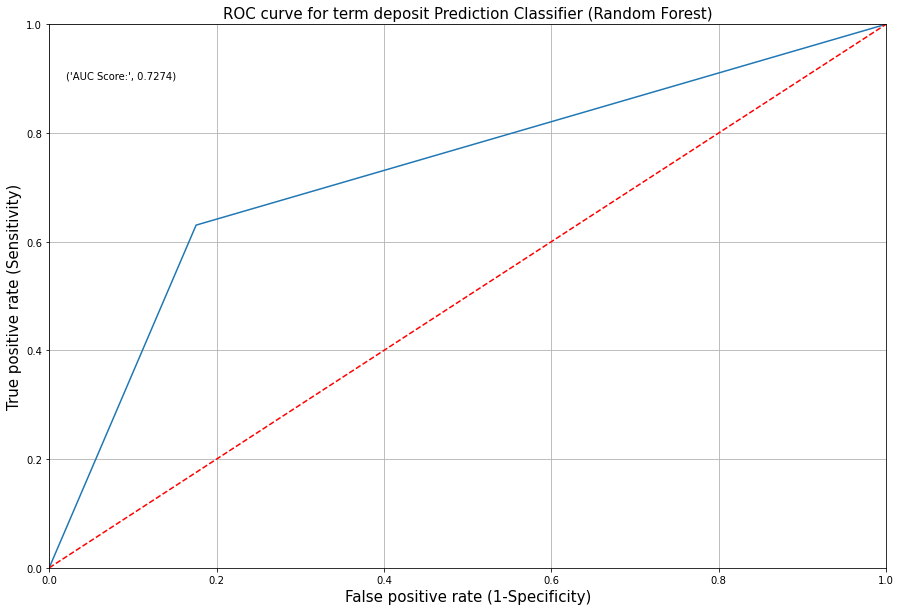

In [164]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pre_rfc)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for term deposit Prediction Classifier (Random Forest)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pre_rfc),4)))
plt.grid(True)

### Important features : Random Forest for Classification

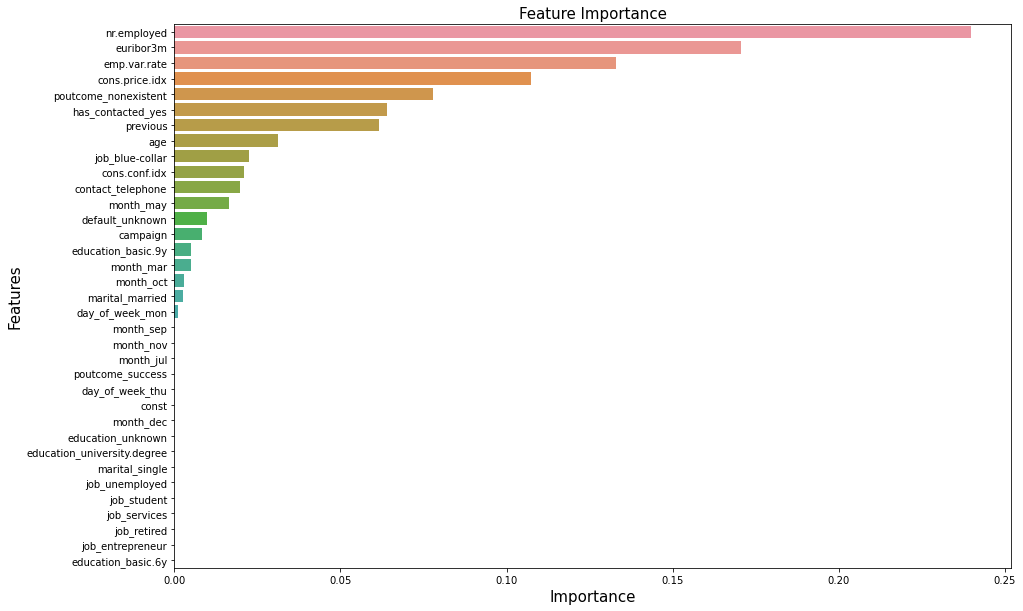

In [165]:
important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# ALGORITHM : 5

# 5.0 KNeighbors Classifier (KNN)

In [162]:
from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(weights='uniform',
    algorithm='brute',
    leaf_size=30,
    p=2,
    metric='minkowski',n_neighbors=5)
  
knn.fit(X_train, Y_train)

y_pred_knn_te=knn.predict(X_test)
y_pred_knn_tr=knn.predict(X_train)

### 5.3 Confusion Matrix : KNeighbors Classifier

### Test data

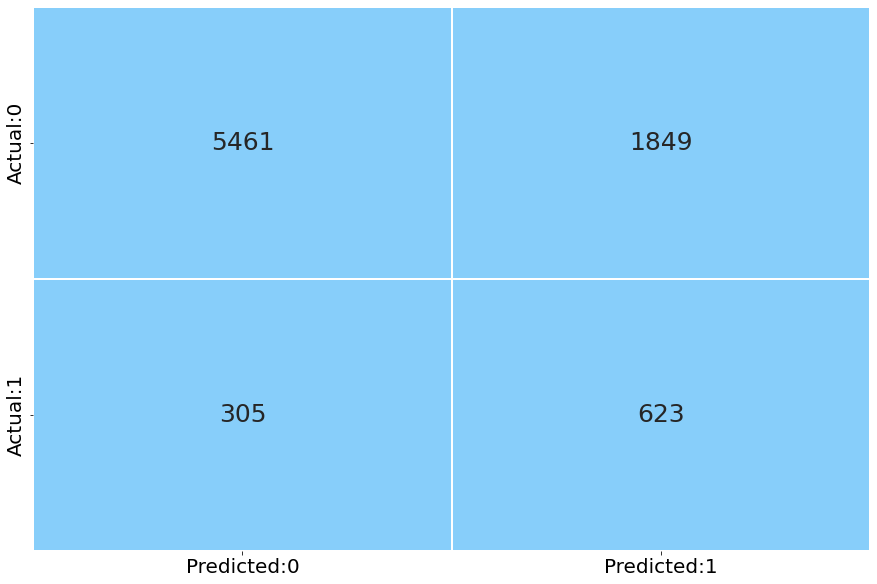

In [167]:
cm = confusion_matrix(Y_test, y_pred_knn_te)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Performance Metrics :KNeighbors Classifier (KNN)

In [168]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [169]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 67.13362068965517
False Positive Rate: 25.294117647058822
True Negative Rate: 74.70588235294117
False Negative Rate: 32.866379310344826


### Train data

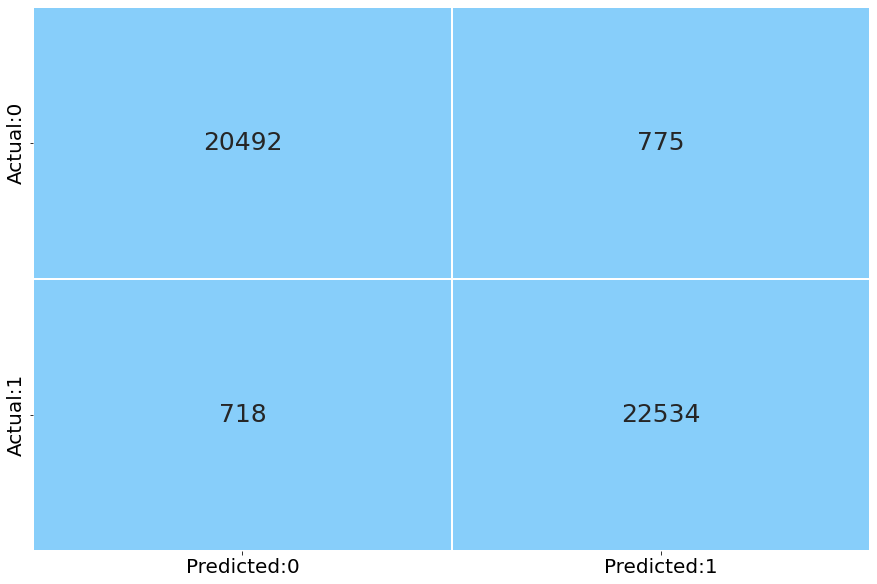

In [363]:
cm = confusion_matrix(Y_train, y_pred_knn_tr)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [364]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [365]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 96.91209358334767
False Positive Rate: 3.644143508722434
True Negative Rate: 96.35585649127756
False Negative Rate: 3.087906416652331


### 5.1 Performance measures on the train set.

In [170]:
result = classification_report(Y_train, y_pred_knn_tr)

print(result)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     21286
           1       0.97      0.97      0.97     23236

    accuracy                           0.97     44522
   macro avg       0.97      0.97      0.97     44522
weighted avg       0.97      0.97      0.97     44522



### 5.2 Performance measures on the test set.

In [171]:
result = classification_report(Y_test, y_pred_knn_te)

print(result)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7310
           1       0.25      0.67      0.37       928

    accuracy                           0.74      8238
   macro avg       0.60      0.71      0.60      8238
weighted avg       0.87      0.74      0.78      8238



# Interpretation:
From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the KNeighbors Classifier is  over-fitted on the train data.

If we tune the hyperparameters in the Random Forest for Classification, it helps to avoid the over-fitting of the KNeighbors Classifier

### Precision

In [172]:
precision_knn = TP / (TP+FP)
precision_knn

0.25202265372168287

### Recall

In [173]:
Recall_knn = TP / (TP+FN)
Recall_knn

0.6713362068965517

### Specificity

In [174]:
specificity_knn = TN / (TN+FP)
specificity_knn

0.7470588235294118

### f1 score

In [175]:
f1_score_knn = 2*((precision*recall)/(precision+recall))
f1_score_knn

0.40598885793871864

### Accuracy

In [176]:
accuracy_knn = (TN+TP) / (TN+FP+FN+TP)

accuracy_knn

0.7385287691187181

### ROC AUC SCORE : KNN

In [164]:
ROC_AUC_SCORE_KNN_TEST=roc_auc_score(Y_test, y_pred_knn_te)
print('ROC_AUC_SCORE_KNN:',ROC_AUC_SCORE_KNN_TEST)

ROC_AUC_SCORE_KNN: 0.7004316241332138


In [165]:
ROC_AUC_SCORE_KNN_TRAIN=roc_auc_score(Y_train, y_pred_knn_tr)
print('ROC_AUC_SCORE_KNN_TRAIN:',ROC_AUC_SCORE_KNN_TRAIN)

ROC_AUC_SCORE_KNN_TRAIN: 0.96715113268905


# ALGORITHM : 6

# 6.0 XGBClassifier

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [109]:
y_prd_xgb_te = xgb.predict(X_test)
y_prd_xgb_tr = xgb.predict(X_train)

### 6.1 Performance measures on the train set.

In [110]:
result = classification_report(Y_train, y_prd_xgb_tr)

print(result)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21273
           1       0.99      0.96      0.98     23234

    accuracy                           0.98     44507
   macro avg       0.98      0.98      0.98     44507
weighted avg       0.98      0.98      0.98     44507



### 6.2 Performance measures on the test set.

In [111]:
result = classification_report(Y_test, y_prd_xgb_te)

print(result)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7310
           1       0.45      0.54      0.49       928

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.71      8238
weighted avg       0.88      0.87      0.88      8238



# Interpretation:
From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the XGBClassifier is over-fitted on the train data.

If we tune the hyperparameters in the XGBClassifier, it helps to avoid the over-fitting of the XGBClassifier

### 6.3 Confusion Matrix : XGBClassifier

### Test data

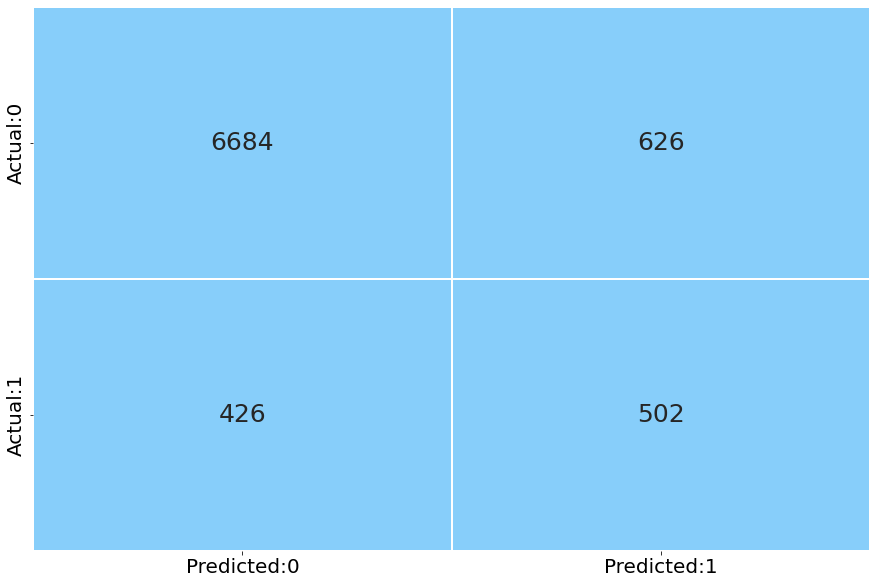

In [112]:
cm = confusion_matrix(Y_test, y_prd_xgb_te)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [185]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [186]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 54.525862068965516
False Positive Rate: 8.522571819425446
True Negative Rate: 91.47742818057456
False Negative Rate: 45.474137931034484


### Train data

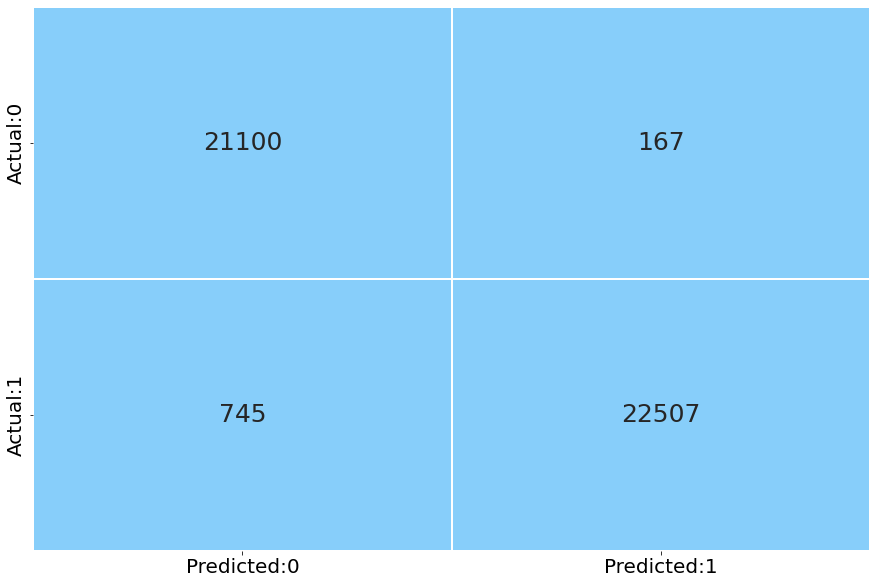

In [371]:
cm = confusion_matrix(Y_train, y_prd_xgb_tr)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [372]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [373]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 96.79597453982454
False Positive Rate: 0.7852541496214792
True Negative Rate: 99.21474585037852
False Negative Rate: 3.2040254601754685


### Precision

In [187]:
precision_xgb = TP / (TP+FP)
precision_xgb

0.4481842338352524

### Recall

In [188]:
Recall_xgb = TP / (TP+FN)
Recall_xgb

0.5452586206896551

### Specificity

In [189]:
specificity_xgb = TN / (TN+FP)
specificity_xgb

0.9147742818057456

### f1_score

In [190]:
f1_score_xgb = 2*((precision_xgb*Recall_xgb)/(precision_xgb+Recall_xgb))
f1_score_xgb

0.4919786096256684

### Accuracy

In [191]:
accuracy_xgb = (TN+TP) / (TN+FP+FN+TP)

accuracy_xgb

0.8731488225297402

### 6.4 ROC AUC SCORE : XGBClassifier

In [170]:
ROC_AUC_SCORE_XGB_TEST=roc_auc_score(Y_test, y_prd_xgb_te)
print('ROC_AUC_SCORE_XGB_TEST:',ROC_AUC_SCORE_XGB_TEST)

ROC_AUC_SCORE_XGB_TEST: 0.7232005342233124


In [171]:
ROC_AUC_SCORE_XGB_TRAIN=roc_auc_score(Y_train, y_prd_xgb_tr)
print('ROC_AUC_SCORE_XGB_TRAIN:',ROC_AUC_SCORE_XGB_TRAIN)

ROC_AUC_SCORE_XGB_TRAIN: 0.9790472749084537


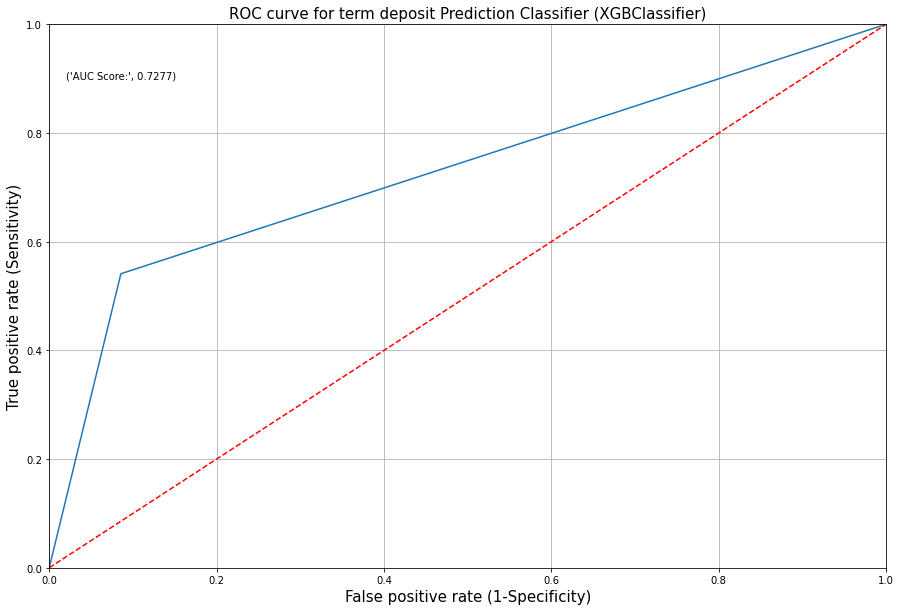

In [114]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prd_xgb_te)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for term deposit Prediction Classifier (XGBClassifier)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_prd_xgb_te),4)))
plt.grid(True)

## Important features from XGBClassifier

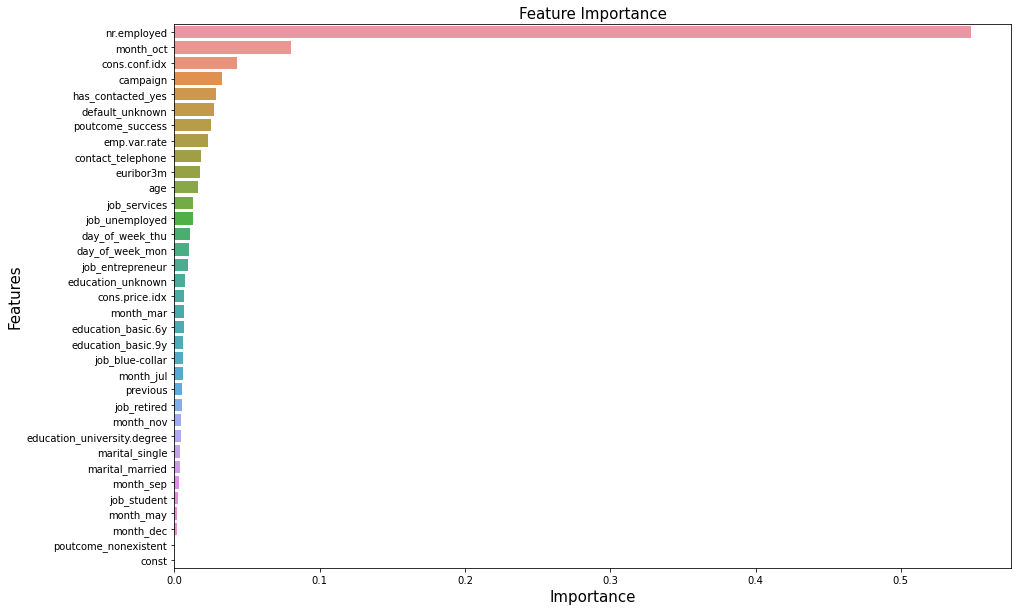

In [193]:
important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': xgb.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# MODEL COMPERSION BASED ON PERFORAMANCE MATRICES

In [238]:
models_score= pd.DataFrame({'Models': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','XGBClassifier',"KNeighbors Classifier (KNN)"],
                'Recall score':  [recall_lr, recall_rf,recall_dt,Recall_xgb,Recall_knn],
                 'Precision score':[precision_lr,precision_rf,precision_dt,precision_xgb,precision_knn],
                 'Specificity score':[specificity_lr,specificity_rf,specificity_dt,specificity_xgb,specificity_knn],
                 'F1 score':[f1_score_lr,f1_score_rf,f1_score_dt,f1_score_xgb,f1_score_knn],
                  'Accuracy':[accuracy_lr,accuracy_rf,accuracy_dt,accuracy_xgb,accuracy_knn],
                 'ROC AUC score':[ROC_AUC_SCORE_LR,ROC_AUC_SCORE_RF,ROC_AUC_SCORE_DT,ROC_AUC_SCORE_XGB,ROC_AUC_SCORE_KNN]})

models_score.sort_values('ROC AUC score',ascending=False)

,Models,Recall score,Precision score,Specificity score,F1 score,Accuracy,ROC AUC score
3,XGBClassifier,0.545259,0.448184,0.914774,0.491979,0.873149,0.730016
1,Random Forest Classifier,0.630388,0.313169,0.824487,0.418455,0.802622,0.727437
0,Logistic Regression,0.582974,0.356155,0.866211,0.442174,0.834304,0.724592
4,KNeighbors Classifier (KNN),0.671336,0.252023,0.747059,0.405989,0.738529,0.709198
2,Decision Tree Classifier,0.547414,0.331809,0.860055,0.413176,0.824836,0.703734


# Interpretation : 
Selecting the best models based on confusion matrices, ROC AUC SCORES, Prescision,recall,f1-score and accuarcy from the above report for tuning the Hyperparameters for the best models.

We are selecting Logistic Regression, Decision Tree Classifier and Random forest classifier for Hyperparameters tuning to get good fitted model.

# Tuning the Hyperparameters for the best models 

# Tuning the Hyperparameters using GridSearchCV (Logistic Regression)

In [197]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8277254660788765


In [200]:
y_pred_lr_ht_te=logreg_cv.predict(X_test)
y_pred_lr_ht_tr=logreg_cv.predict(X_train)

In [201]:
result = classification_report(Y_train, y_pred_lr_ht_tr)

print(result)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83     21286
           1       0.89      0.76      0.82     23236

    accuracy                           0.83     44522
   macro avg       0.83      0.83      0.83     44522
weighted avg       0.84      0.83      0.83     44522



In [202]:
result = classification_report(Y_test, y_pred_lr_ht_te)

print(result)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7310
           1       0.30      0.63      0.41       928

    accuracy                           0.79      8238
   macro avg       0.62      0.72      0.64      8238
weighted avg       0.87      0.79      0.82      8238



# Tune the Hyperparameters using GridSearchCV (Decision Tree)¶

In [203]:
param_dist = {"max_depth": [2, 6], "max_features": [1,3,4,5,7,8,9], "min_samples_leaf": [1,3,4,5,6,7],"criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
tree_cv.fit(X_train, Y_train)
print("Tuned Decision Tree Parameters with GridSearchCV: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters with GridSearchCV: {'criterion': 'gini', 'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 7}
Best score is 0.8349580729604142


### Build the model using the tuned hyperparameters.

In [205]:
y_pred_test = tree_cv.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_test)) 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7310
           1       0.38      0.59      0.46       928

    accuracy                           0.85      8238
   macro avg       0.66      0.73      0.69      8238
weighted avg       0.88      0.85      0.86      8238



In [204]:
y_pred_train = tree_cv.predict(X_train)
print(metrics.classification_report(Y_train, y_pred_train)) 

              precision    recall  f1-score   support

           0       0.75      0.96      0.84     21286
           1       0.95      0.71      0.81     23236

    accuracy                           0.83     44522
   macro avg       0.85      0.84      0.83     44522
weighted avg       0.86      0.83      0.83     44522



### Interpretation:
From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

# Tune the Hyperparameters using GridSearchCV (Random Forest)¶

In [239]:
param_dist = {"max_depth": [2, 6], "max_features": [1,3,4,5,7,8,9],
              "min_samples_leaf": [1,3,4,5,6,7],"criterion": ["gini", "entropy"]}

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(random_forest_classification, param_dist, cv = 5)
rf_grid.fit(X_train,Y_train)
print("Tuned Random Forest Parameters with GridSearchCV: {}".format(rf_grid.best_params_))
print("Best score is {}".format(rf_grid.best_score_))

Tuned Random Forest Parameters with GridSearchCV: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 4}
Best score is 0.8361706351308336


### Build the model using the tuned hyperparameters.¶

In [240]:
y_pred_test_re = g_search.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_test_re)) 

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7310
           1       0.35      0.58      0.44       928

    accuracy                           0.83      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.83      0.85      8238



## Interpretation:
From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the random forest is less over-fiited after specifying some of the hyperparameters.

# IMPORTANT FEATURES FROM RANDOM FOREST MODEL FOR BOOSTING 

In [174]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# RECURSIVE FEATURE ELIMINATION

In [85]:
rfe_model = RFE(estimator = rf_classification, n_features_to_select = 25)
rfe_model = rfe_model.fit(X_train, Y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_services', 'marital_married', 'marital_single',
       'default_unknown', 'contact_telephone', 'month_dec', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


In [86]:
X_train_rfe=X_train[['previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_services', 'marital_married', 'marital_single',
       'default_unknown', 'contact_telephone', 'month_dec', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'poutcome_nonexistent',
       'poutcome_success']]

In [87]:
X_test_rfe=X_test[['previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_services', 'marital_married', 'marital_single',
       'default_unknown', 'contact_telephone', 'month_dec', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'poutcome_nonexistent',
       'poutcome_success']]

# Important Feature selection using SelectFromModel

This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [123]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,data_target)

ExtraTreesClassifier()

In [124]:
print(model.feature_importances_)

[0.         0.25714394 0.13788243 0.01868946 0.01805389 0.01739057
 0.01886168 0.15288961 0.04367648 0.01341972 0.00649551 0.01053258
 0.01071418 0.00712821 0.00698406 0.01846197 0.01412065 0.0075734
 0.01327221 0.02088602 0.00940023 0.01259632 0.01720533 0.0012275
 0.00330233 0.00921254 0.01264162 0.00265373 0.00717849 0.00378397
 0.01734852 0.01868587 0.01181989 0.03322576 0.04554135]


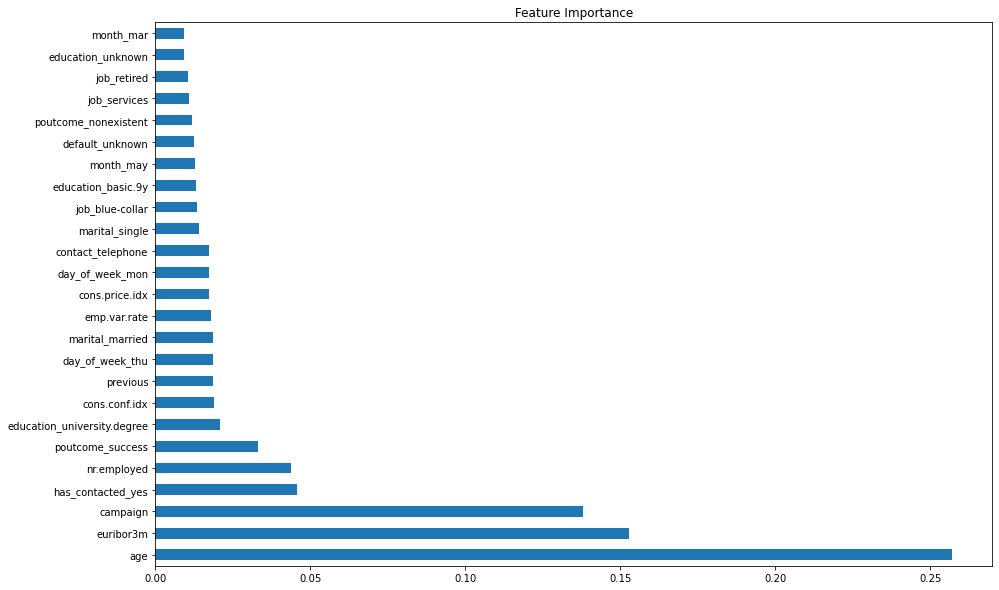

In [126]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(25).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# Boosting Methods

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## ALGORITHM : 1

## AdaBoost

In [88]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train_rfe, Y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [89]:
 y_pred_ada = ada_model.predict(X_test_rfe)

## Confusion Matrix : AdaBoostClassifier

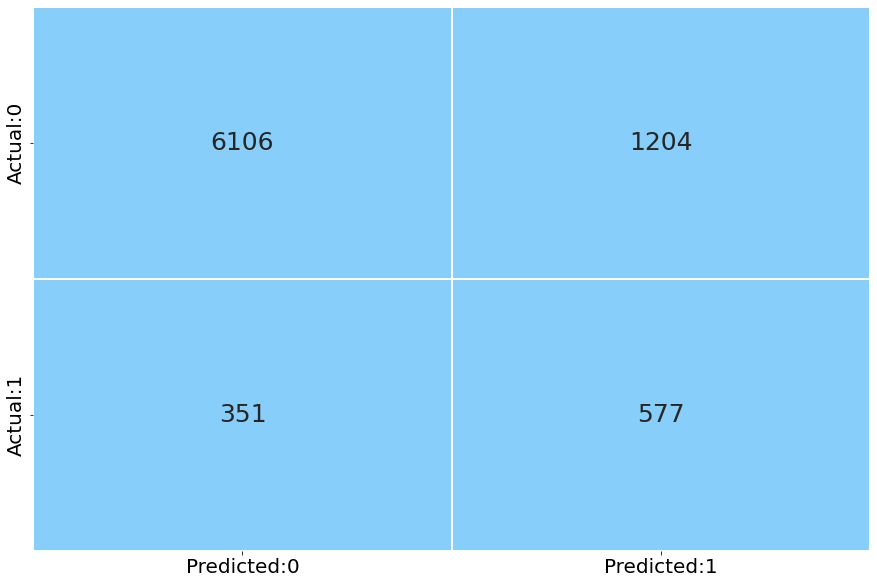

In [90]:
cm = confusion_matrix(Y_test, y_pred_ada)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Performance Metrics :AdaBoostClassifier

In [91]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [92]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 62.17672413793104
False Positive Rate: 16.470588235294116
True Negative Rate: 83.52941176470588
False Negative Rate: 37.82327586206897


### Performance measures on the test set.

In [93]:
result = classification_report(Y_test, y_pred_ada)

print(result)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7310
           1       0.32      0.62      0.43       928

    accuracy                           0.81      8238
   macro avg       0.63      0.73      0.66      8238
weighted avg       0.88      0.81      0.84      8238



### Performance measures on the train set.

In [94]:
 y_pred_ada_tr = ada_model.predict(X_train_rfe)

In [95]:
result = classification_report(Y_train, y_pred_ada_tr)

print(result)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     21253
           1       0.91      0.75      0.83     23073

    accuracy                           0.83     44326
   macro avg       0.84      0.84      0.83     44326
weighted avg       0.85      0.83      0.83     44326



## ROC curve.

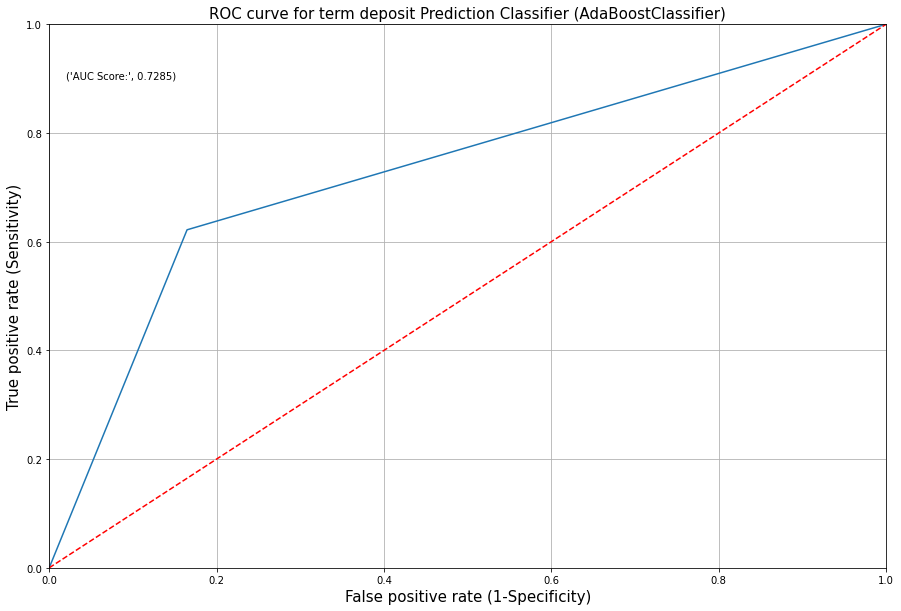

In [96]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_ada)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for term deposit Prediction Classifier (AdaBoostClassifier)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_ada),4)))
plt.grid(True)

## ALGORITHM : 2

## Gradient Boosting

In [77]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train_rfe, Y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [78]:
 y_pred_gredient = gboost_model.predict(X_test_rfe)

### Confusion Matrix : Gradient Boosting

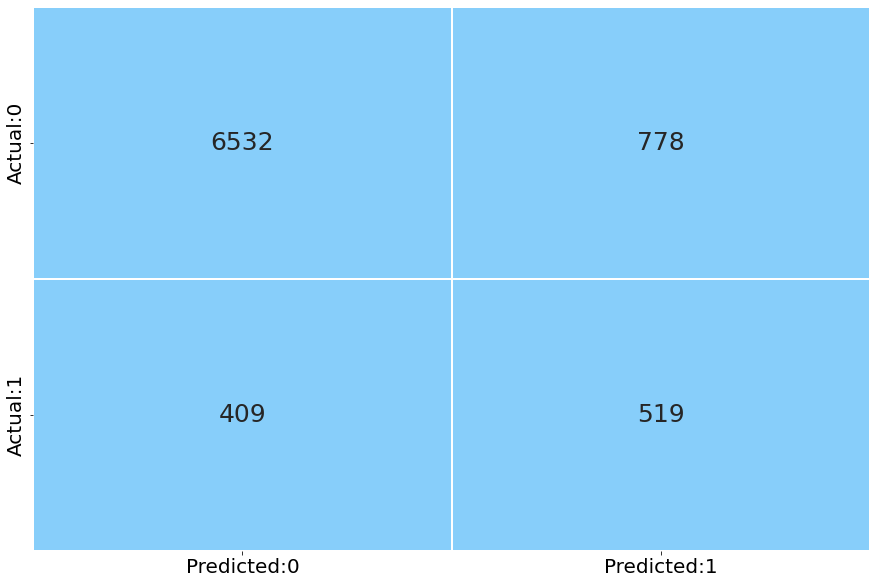

In [79]:
cm = confusion_matrix(Y_test, y_pred_gredient)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Performance Metrics :Gradient Boosting

In [80]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [81]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 55.92672413793104
False Positive Rate: 10.642954856361149
True Negative Rate: 89.35704514363884
False Negative Rate: 44.07327586206897


In [82]:
test_report = get_test_report(gboost_model)
print(test_report)

NameError: name 'get_test_report' is not defined

### ROC AUC SCORE GREDIENT

In [83]:
ROC_AUC_SCORE_GREDIENT=roc_auc_score(Y_test, y_pred_gredient)
print('ROC_AUC_SCORE_GREDIENT:',ROC_AUC_SCORE_GREDIENT)

ROC_AUC_SCORE_GREDIENT: 0.7264188464078495


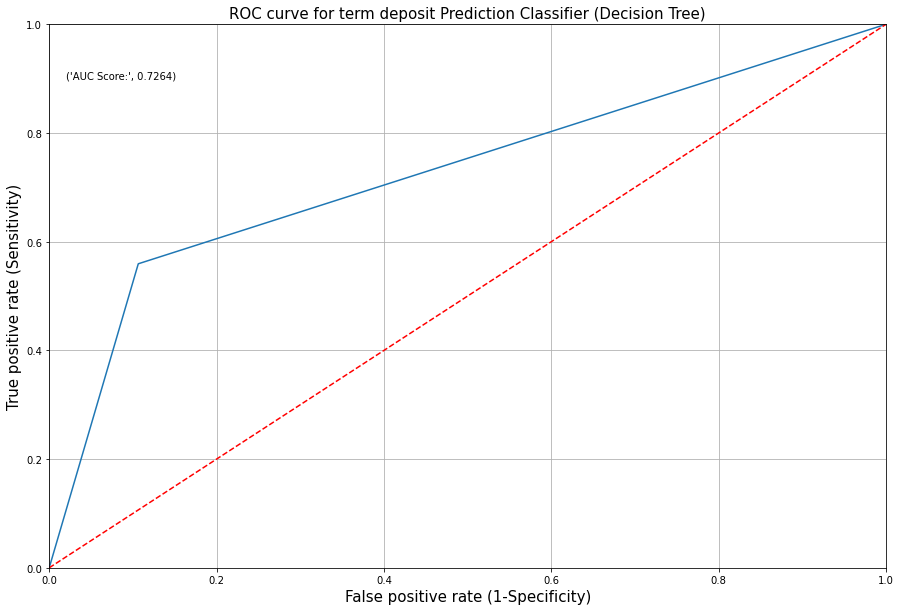

In [84]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_gredient)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for term deposit Prediction Classifier (Decision Tree)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_gredient),4)))
plt.grid(True)

In [180]:
models_roc_auc_score= pd.DataFrame({'MODELS': ['Logistic Regression','Random Forest Classifier'
                                       ,'Decision Tree Classifier','XGBClassifier',"KNeighbors Classifier (KNN)"],
                
                 'TRAIN ROC AUC SCORE':[ROC_AUC_SCORE_LR_TRAIN,ROC_AUC_SCORE_RF_TRAIN,ROC_AUC_SCORE_DT_TRAIN,ROC_AUC_SCORE_XGB_TRAIN,ROC_AUC_SCORE_KNN_TRAIN],
           'TEST ROC AUC SCORE':[ROC_AUC_SCORE_LR_TEST,ROC_AUC_SCORE_RF_TEST,ROC_AUC_SCORE_DT_TEST,ROC_AUC_SCORE_XGB_TEST,ROC_AUC_SCORE_KNN_TEST]})

# MODEL COMPERSION BASED ON ROC AUC SCORE PERFORAMANCE MATRICES TO SELECT FINAL MODEL

In [181]:
models_roc_auc_score.sort_values('TEST ROC AUC SCORE',ascending=False)

,MODELS,TRAIN ROC AUC SCORE,TEST ROC AUC SCORE
1,Random Forest Classifier,0.822365,0.727542
0,Logistic Regression,0.903680,0.723233
3,XGBClassifier,0.979047,0.723201
2,Decision Tree Classifier,0.962980,0.708693
4,KNeighbors Classifier (KNN),0.967151,0.700432


### Interpreation : 
    Based on ROC AUC SCORE we are selecting Random Forest Classifier as a final model,Bacause it is less over fitted on both train and test data

# FINAL MODEL : Random Forest Classifier	

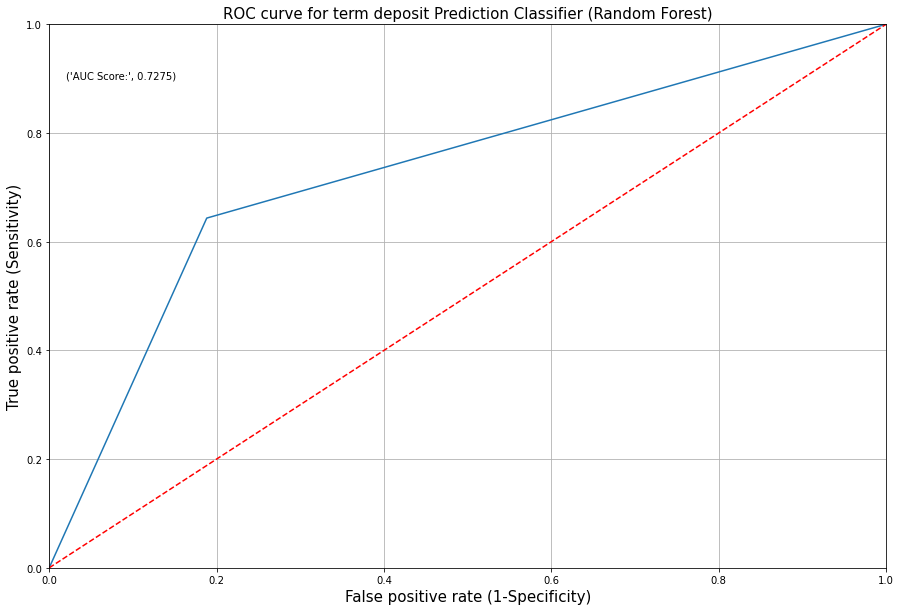

In [182]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pre_rfc)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for term deposit Prediction Classifier (Random Forest)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pre_rfc),4)))
plt.grid(True)

# Conclusion & Recommendations

## Conclusion:

The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign, which was successfully met through data analysis, visualization and analytical model building. A target customer profile was established while classification and regression models were built to predict customers' response to the term deposit campaign.


According to previous analysis, a target customer profile can be established. The most responsive customers possess these features:

Feature 1: age < 30 or age > 60

Feature 2: students or retired people

Feature 3: a balance of more than 5000 euros
    
By applying logistic regression, Decision Tree , Random forest and XGB classifier algorithms, classification and estimation model were successfully built and we observed the performance matrices like ROC AUC SCORE, Recall, F1 score and Accuracy.With help of confusion matrix we observed the model is overfitting on train data initailly.To reduce the overfitting we selected the significant features to bulid the model, after that we got a less overfitted model with the significant features.

We have selected the ROC AUC score to evalute the models, beacuse it i sa performance measurement for the classification problem at varies thresold setting and ROC curve plots TPR vs FRP at different classification thresholds.Lowering the classification more items as positive, thus increasing both False Positive and True Positives.

We have compared the ROC AUC score of different models.finally we have selected the random forest model as final based on ROC AUC score, beacuse it is less overfitted on both train and test data.

With these models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of llogistic regression, Decision Tree , Random forest and XGB classifier algorithms models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.

## Recommendations

1.When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that May and October had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.

2.By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers.

3.With a more granular(including small details) understanding of its customer base, the bank has the ability to provide better banking services. For example, marital status and occupation reveal of customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.